# Generative modelling in DL

This notebook a synthesis of my HW for the Deep Learning course I attended at Centralesupelec in 2019. 

The purporse of this notebook is to implement the training procedure of both GANs and VAEs.

To this end, we consider 25 2-dimensional gaussians with small variance and our objective will be to learn them through the two different approaches.

# 1) GANs

In [0]:
#Please run this cell before running all the others
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.distributions import MultivariateNormal
from torch.distributions import Normal
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
def generate_batch(batchlen):
    """This function generates a batch of length 'batchlen' from the 25-gaussian dataset.
    
    return a torch tensor of dimensions (batchlen, 2)
    """
    # to sample from the gaussian mixture, we first sample the means for each point, then
    # add a gaussian noise with small variance
    samples = torch.multinomial(torch.tensor([0.2,0.2,0.2,0.2,0.2]), 2*batchlen, replacement=True)
    means = (2.0 * (samples - 2.0)).view(batchlen,2).type(torch.FloatTensor)
    return torch.normal(means, 0.05)

Let's plot a batch, to see what the dataset looks like.

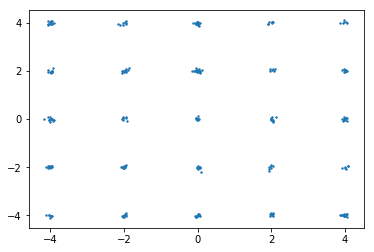

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

batch = generate_batch(256)

plt.scatter(batch[:,0], batch[:,1], s=2.0, label='Batch of data from our gaussian mixture dataset')
plt.show()

In [0]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# Choose a value for the prior dimension
PRIOR_N = 25

# Define the generator
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(PRIOR_N, 100)
        self.fc2 = nn.Linear(100, 600)
        self.fc3 = nn.Linear(600, 1800)
        self.fc4 = nn.Linear(1800, 2)
        
    def __call__(self, z):
        h_1 = F.relu(self.fc1(z))
        h_2 = F.relu(self.fc2(h_1))
        h_3 = F.relu(self.fc3(h_2))
        return self.fc4(h_3)
    
    def generate(self, batchlen):
        z = torch.normal(torch.zeros(batchlen, PRIOR_N), 1.0)
        return self.__call__(z)
    

# Define the discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 20)
        self.fc3 = nn.Linear(20, 50)
        self.fc4 = nn.Linear(50, 20)
        self.fc5 = nn.Linear(20, 1)
    
    def __call__(self, x):
        h_1 = F.relu(self.fc1(x))
        h_2 = F.relu(self.fc2(h_1))
        h_3 = F.relu(self.fc3(h_2))
        h_4 = F.relu(self.fc4(h_3))
        return self.fc5(h_4)

step 0: discriminator: 1.395e+00, generator: 7.884e-01


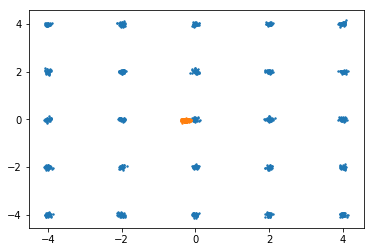

step 100: discriminator: 1.347e+00, generator: 7.304e-01


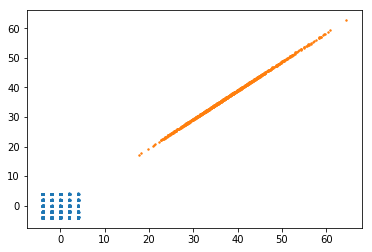

step 200: discriminator: 1.444e+00, generator: 6.792e-01


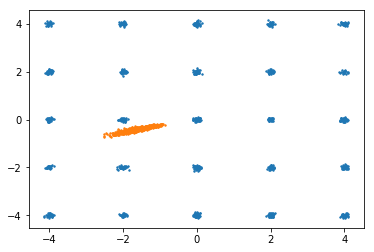

step 300: discriminator: 1.320e+00, generator: 7.497e-01


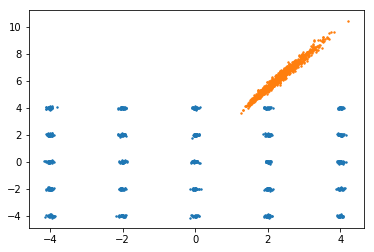

step 400: discriminator: 1.351e+00, generator: 7.925e-01


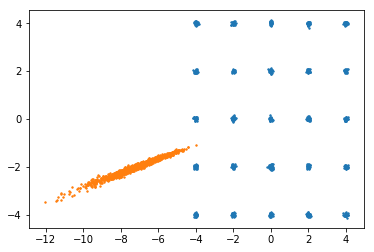

step 500: discriminator: 1.319e+00, generator: 6.963e-01


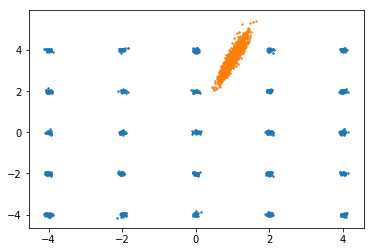

step 600: discriminator: 1.472e+00, generator: 6.672e-01


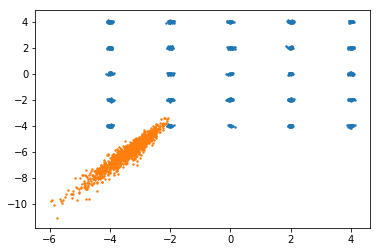

step 700: discriminator: 1.321e+00, generator: 8.357e-01


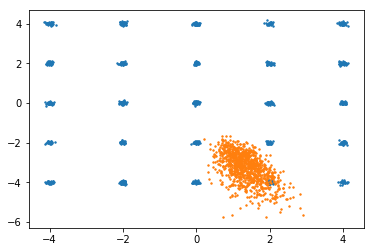

step 800: discriminator: 1.148e+00, generator: 7.067e-01


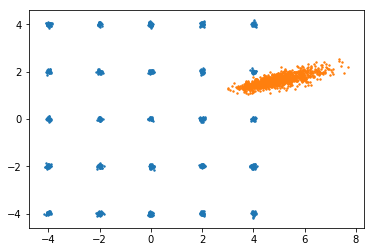

step 900: discriminator: 1.293e+00, generator: 1.164e+00


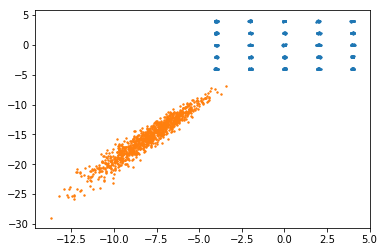

step 1000: discriminator: 1.312e+00, generator: 6.771e-01


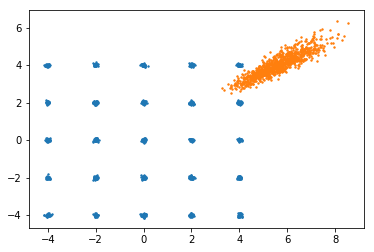

step 1100: discriminator: 1.398e+00, generator: 8.735e-01


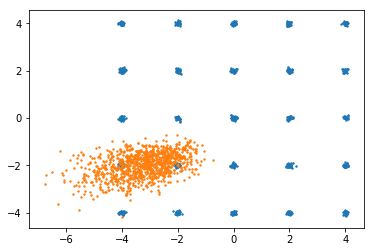

step 1200: discriminator: 1.335e+00, generator: 7.236e-01


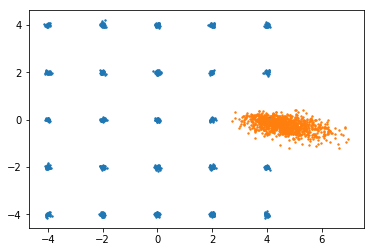

step 1300: discriminator: 1.496e+00, generator: 7.476e-01


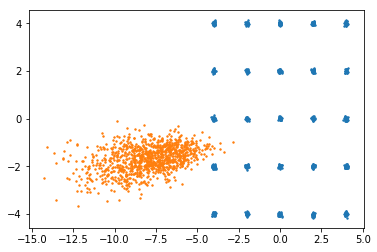

step 1400: discriminator: 1.433e+00, generator: 7.796e-01


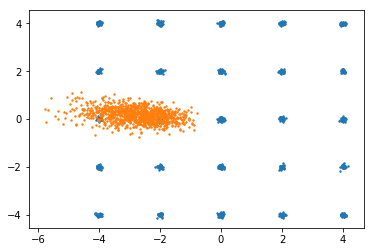

step 1500: discriminator: 1.109e+00, generator: 1.229e+00


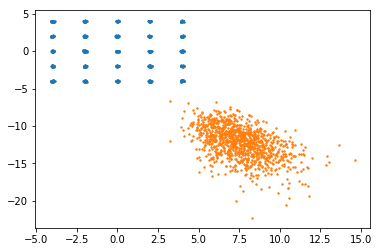

step 1600: discriminator: 1.402e+00, generator: 7.512e-01


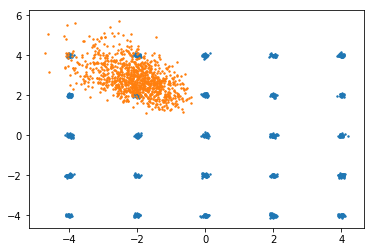

step 1700: discriminator: 1.455e+00, generator: 7.528e-01


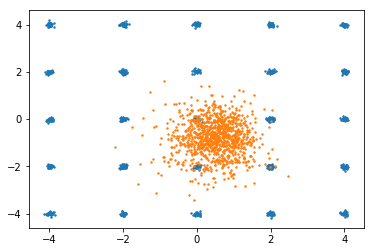

step 1800: discriminator: 1.198e+00, generator: 7.202e-01


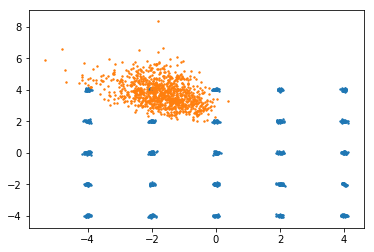

step 1900: discriminator: 1.278e+00, generator: 1.006e+00


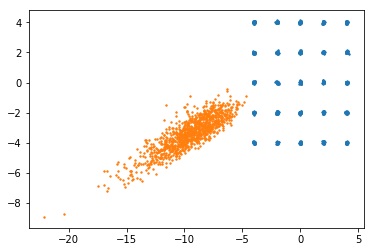

step 2000: discriminator: 1.288e+00, generator: 6.670e-01


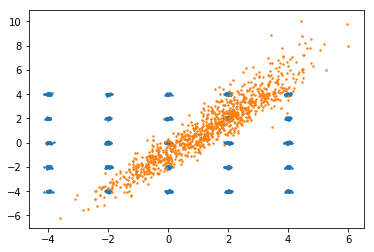

step 2100: discriminator: 1.372e+00, generator: 8.105e-01


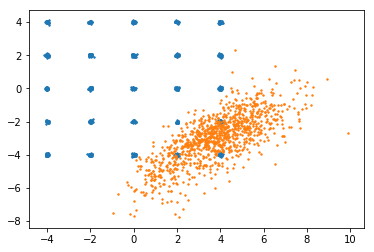

step 2200: discriminator: 1.509e+00, generator: 6.590e-01


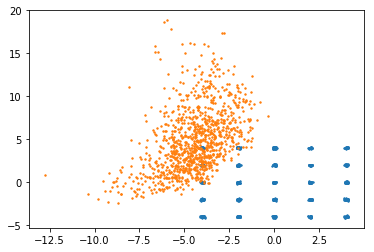

step 2300: discriminator: 1.429e+00, generator: 7.419e-01


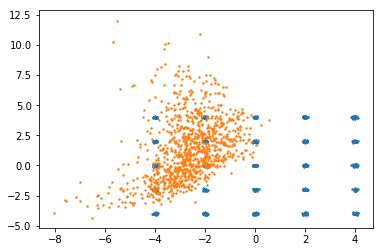

step 2400: discriminator: 1.337e+00, generator: 8.820e-01


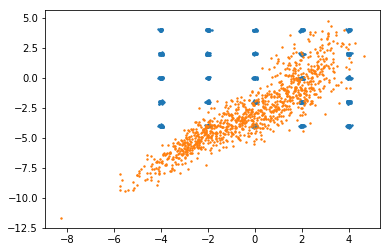

step 2500: discriminator: 1.365e+00, generator: 7.066e-01


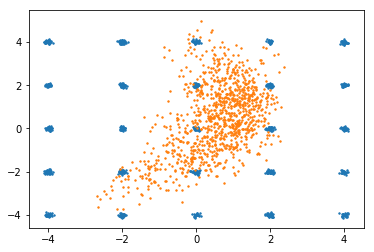

step 2600: discriminator: 1.269e+00, generator: 6.817e-01


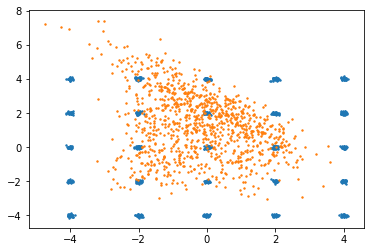

step 2700: discriminator: 1.381e+00, generator: 7.053e-01


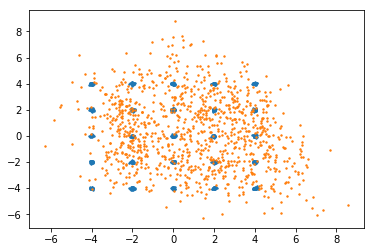

step 2800: discriminator: 1.385e+00, generator: 6.551e-01


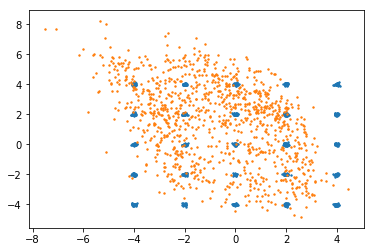

step 2900: discriminator: 1.390e+00, generator: 7.147e-01


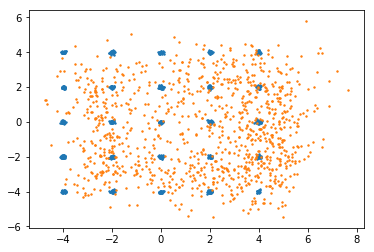

step 3000: discriminator: 1.378e+00, generator: 7.679e-01


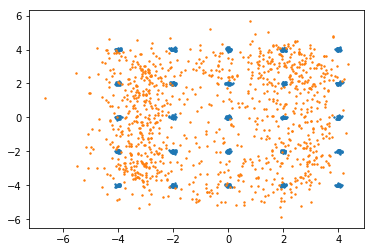

step 3100: discriminator: 1.377e+00, generator: 6.855e-01


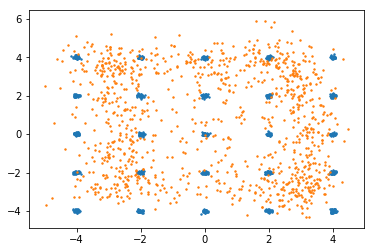

step 3200: discriminator: 1.389e+00, generator: 6.681e-01


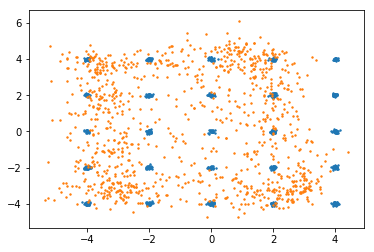

step 3300: discriminator: 1.385e+00, generator: 7.148e-01


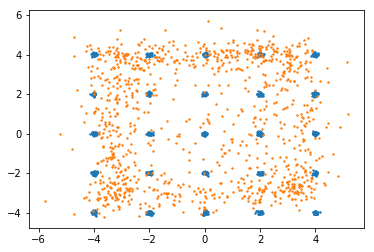

step 3400: discriminator: 1.370e+00, generator: 7.560e-01


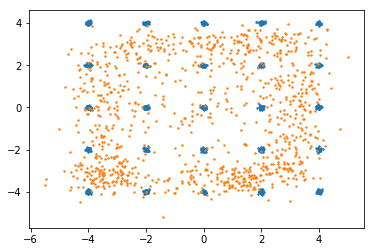

step 3500: discriminator: 1.380e+00, generator: 7.032e-01


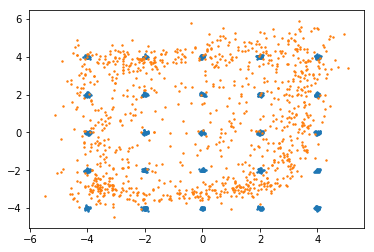

step 3600: discriminator: 1.370e+00, generator: 7.500e-01


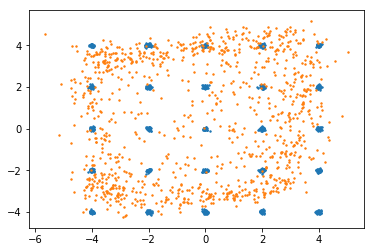

step 3700: discriminator: 1.370e+00, generator: 6.957e-01


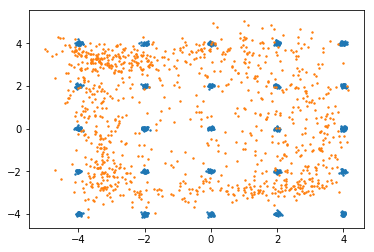

step 3800: discriminator: 1.369e+00, generator: 7.130e-01


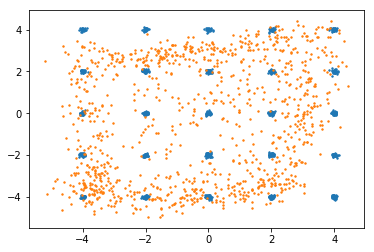

step 3900: discriminator: 1.373e+00, generator: 7.093e-01


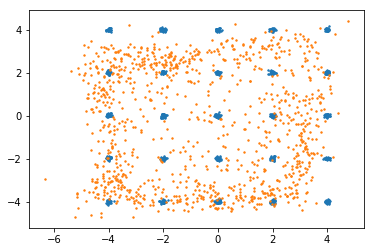

step 4000: discriminator: 1.361e+00, generator: 7.328e-01


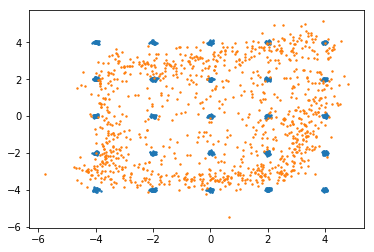

step 4100: discriminator: 1.357e+00, generator: 7.351e-01


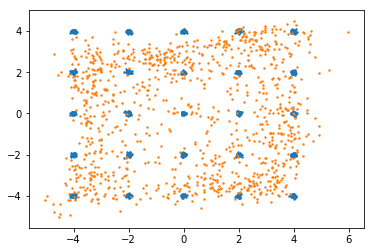

step 4200: discriminator: 1.347e+00, generator: 6.767e-01


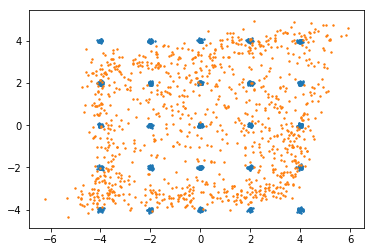

step 4300: discriminator: 1.355e+00, generator: 7.217e-01


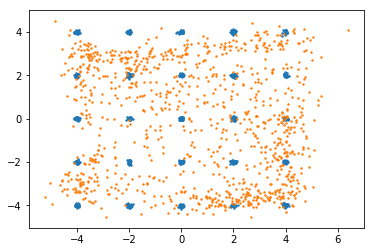

step 4400: discriminator: 1.330e+00, generator: 7.084e-01


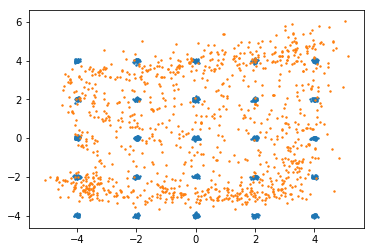

step 4500: discriminator: 1.322e+00, generator: 7.193e-01


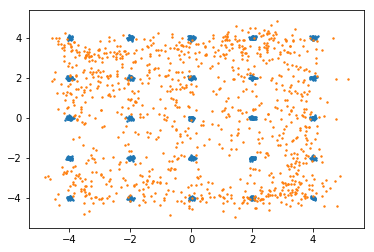

step 4600: discriminator: 1.325e+00, generator: 6.777e-01


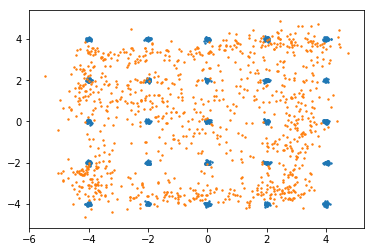

step 4700: discriminator: 1.319e+00, generator: 6.974e-01


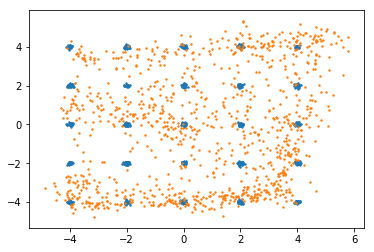

step 4800: discriminator: 1.329e+00, generator: 7.678e-01


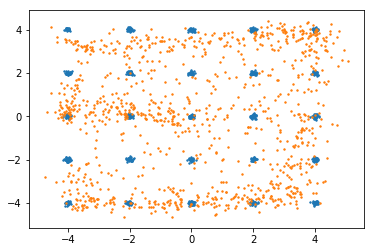

step 4900: discriminator: 1.324e+00, generator: 7.134e-01


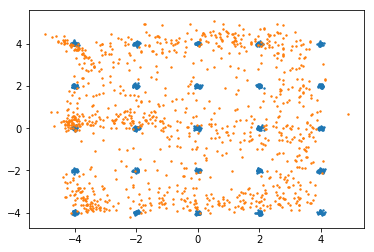

step 5000: discriminator: 1.312e+00, generator: 7.931e-01


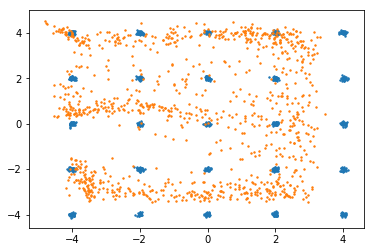

step 5100: discriminator: 1.297e+00, generator: 7.631e-01


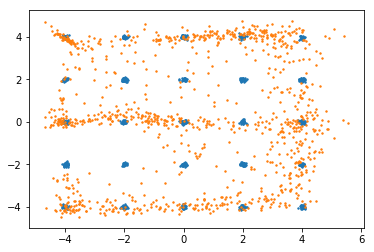

step 5200: discriminator: 1.309e+00, generator: 7.752e-01


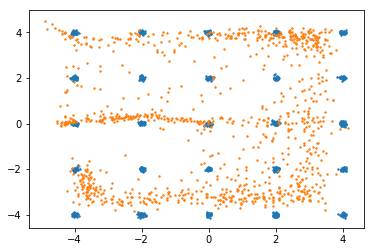

step 5300: discriminator: 1.278e+00, generator: 7.468e-01


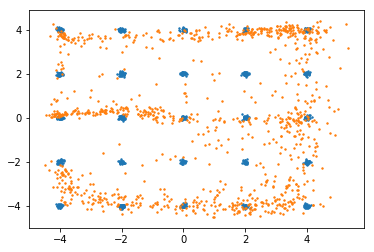

step 5400: discriminator: 1.286e+00, generator: 7.829e-01


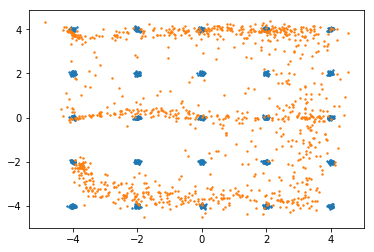

step 5500: discriminator: 1.271e+00, generator: 7.401e-01


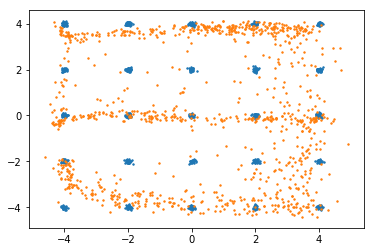

step 5600: discriminator: 1.273e+00, generator: 7.528e-01


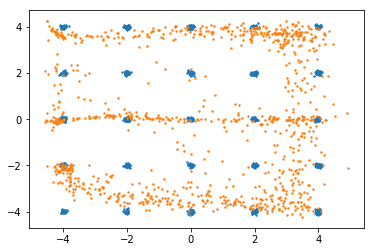

step 5700: discriminator: 1.265e+00, generator: 7.825e-01


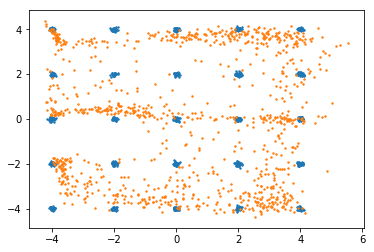

step 5800: discriminator: 1.274e+00, generator: 8.217e-01


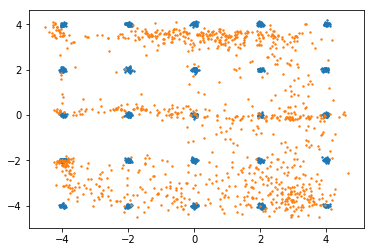

step 5900: discriminator: 1.243e+00, generator: 9.054e-01


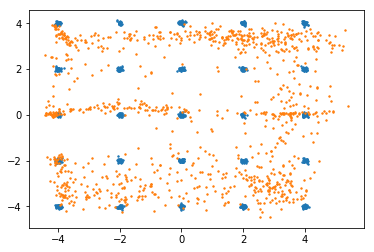

step 6000: discriminator: 1.227e+00, generator: 7.807e-01


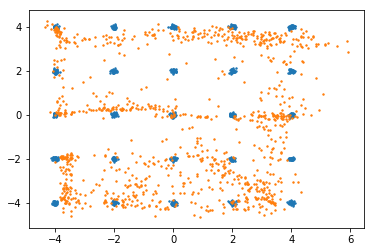

step 6100: discriminator: 1.233e+00, generator: 8.006e-01


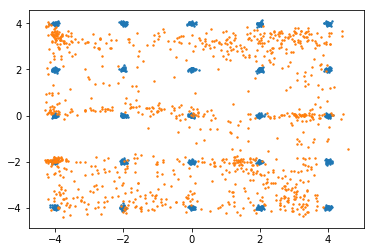

step 6200: discriminator: 1.236e+00, generator: 7.458e-01


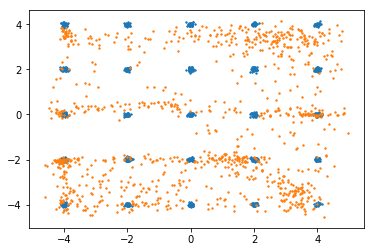

step 6300: discriminator: 1.254e+00, generator: 7.766e-01


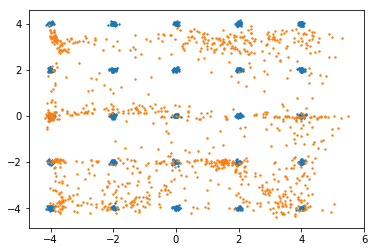

step 6400: discriminator: 1.236e+00, generator: 8.711e-01


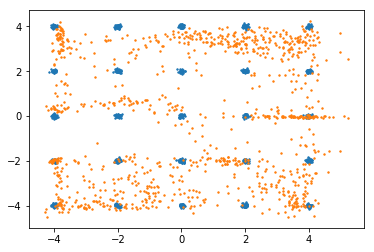

step 6500: discriminator: 1.242e+00, generator: 8.952e-01


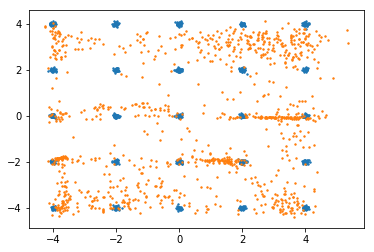

step 6600: discriminator: 1.184e+00, generator: 7.966e-01


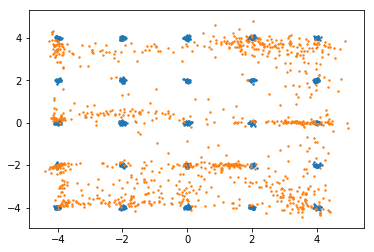

step 6700: discriminator: 1.208e+00, generator: 8.465e-01


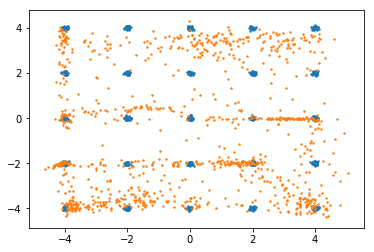

step 6800: discriminator: 1.245e+00, generator: 9.297e-01


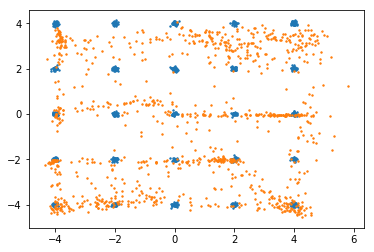

step 6900: discriminator: 1.187e+00, generator: 9.175e-01


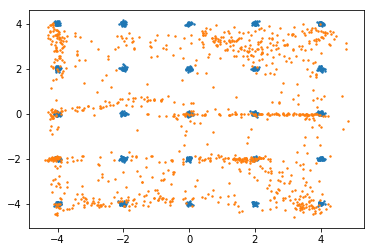

step 7000: discriminator: 1.171e+00, generator: 9.378e-01


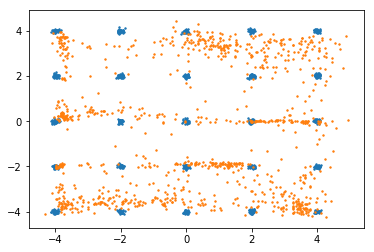

step 7100: discriminator: 1.180e+00, generator: 8.418e-01


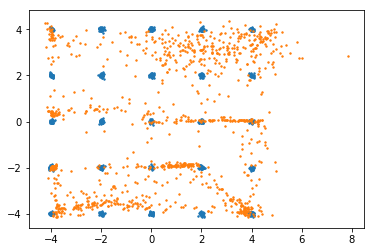

step 7200: discriminator: 1.198e+00, generator: 8.953e-01


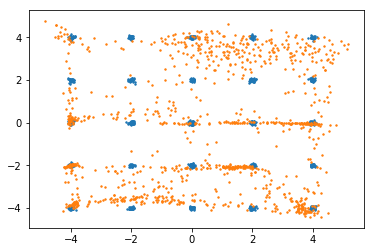

step 7300: discriminator: 1.165e+00, generator: 8.155e-01


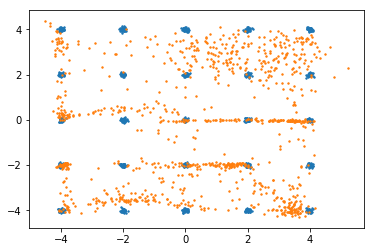

step 7400: discriminator: 1.173e+00, generator: 9.683e-01


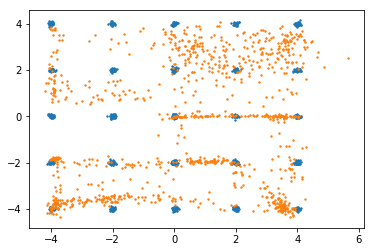

step 7500: discriminator: 1.198e+00, generator: 7.963e-01


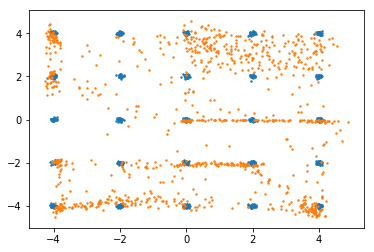

step 7600: discriminator: 1.200e+00, generator: 9.562e-01


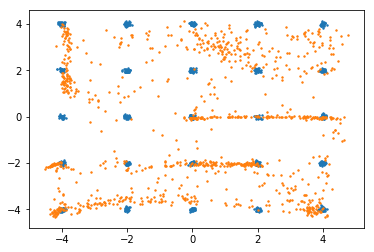

step 7700: discriminator: 1.150e+00, generator: 9.538e-01


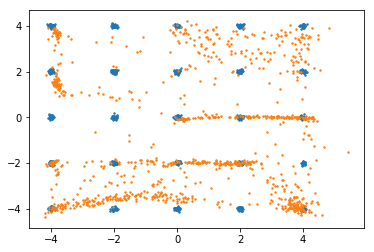

step 7800: discriminator: 1.187e+00, generator: 9.042e-01


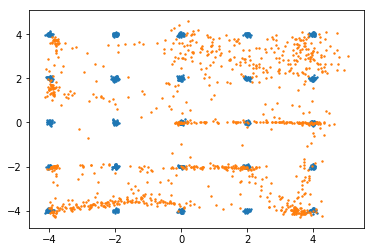

step 7900: discriminator: 1.168e+00, generator: 9.615e-01


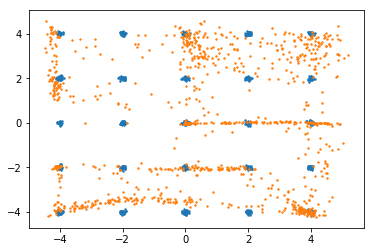

step 8000: discriminator: 1.191e+00, generator: 8.961e-01


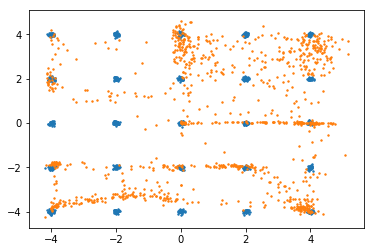

step 8100: discriminator: 1.135e+00, generator: 8.462e-01


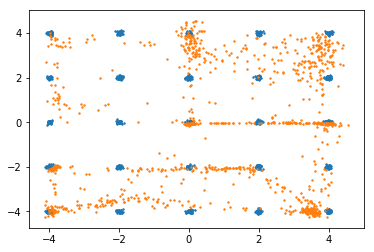

step 8200: discriminator: 1.162e+00, generator: 8.220e-01


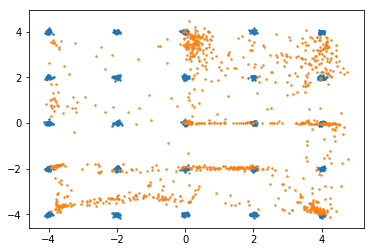

step 8300: discriminator: 1.157e+00, generator: 9.600e-01


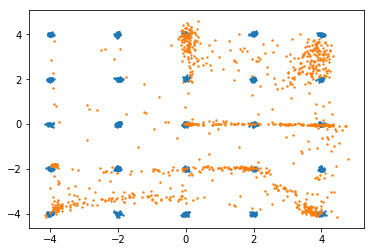

step 8400: discriminator: 1.228e+00, generator: 1.169e+00


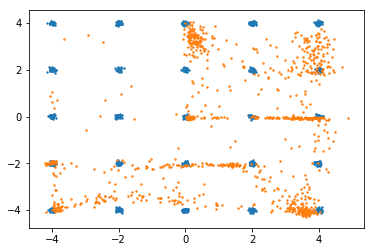

step 8500: discriminator: 1.102e+00, generator: 9.442e-01


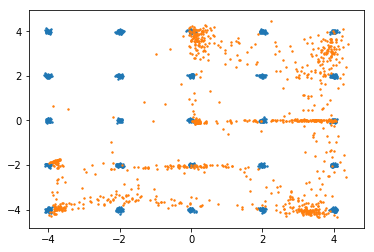

step 8600: discriminator: 1.138e+00, generator: 1.059e+00


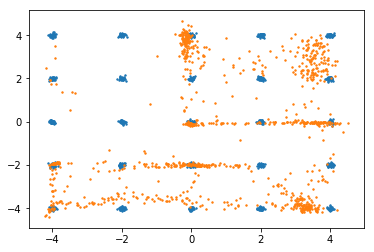

step 8700: discriminator: 1.232e+00, generator: 1.229e+00


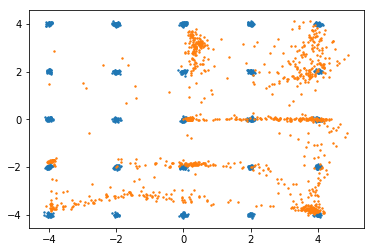

step 8800: discriminator: 9.997e-01, generator: 9.717e-01


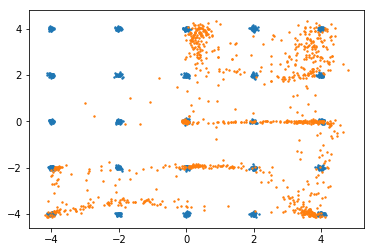

step 8900: discriminator: 1.080e+00, generator: 1.001e+00


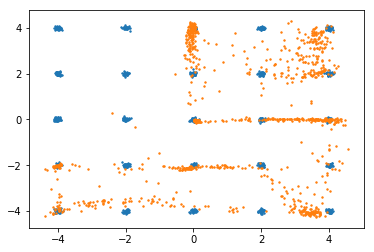

step 9000: discriminator: 1.022e+00, generator: 1.078e+00


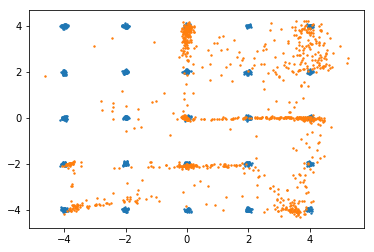

step 9100: discriminator: 1.093e+00, generator: 1.018e+00


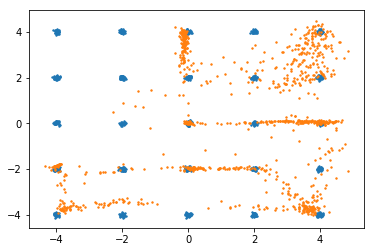

step 9200: discriminator: 1.085e+00, generator: 1.044e+00


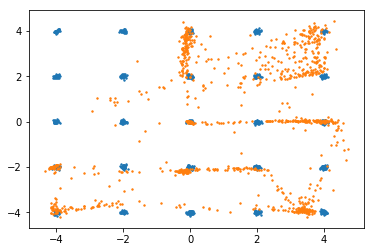

step 9300: discriminator: 1.051e+00, generator: 9.703e-01


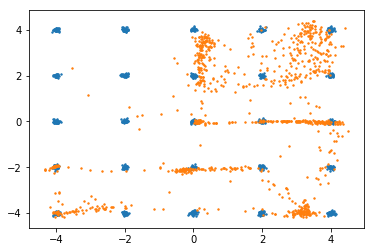

step 9400: discriminator: 1.051e+00, generator: 1.188e+00


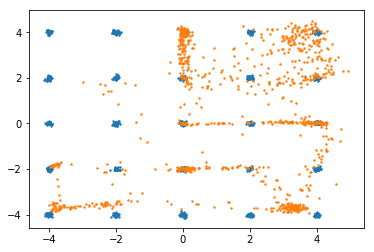

step 9500: discriminator: 1.178e+00, generator: 1.242e+00


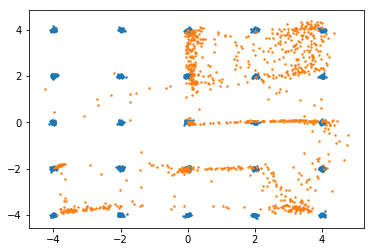

step 9600: discriminator: 1.108e+00, generator: 9.817e-01


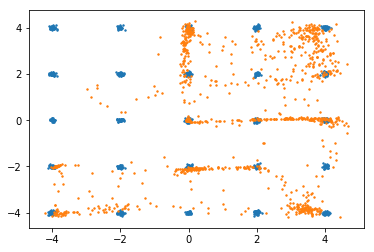

step 9700: discriminator: 9.892e-01, generator: 9.530e-01


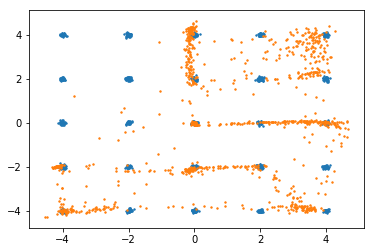

step 9800: discriminator: 1.196e+00, generator: 1.028e+00


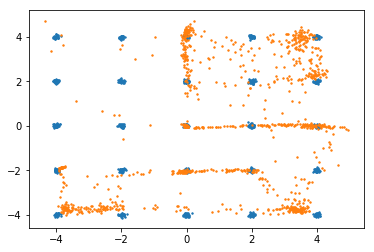

step 9900: discriminator: 1.019e+00, generator: 1.075e+00


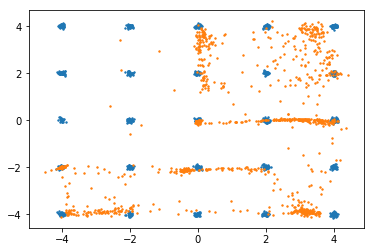

step 10000: discriminator: 1.107e+00, generator: 1.077e+00


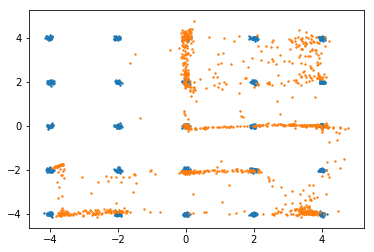

step 10100: discriminator: 1.068e+00, generator: 1.042e+00


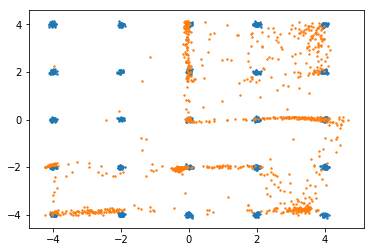

step 10200: discriminator: 1.040e+00, generator: 1.273e+00


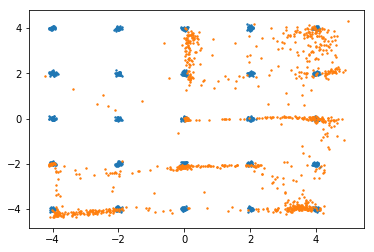

step 10300: discriminator: 1.087e+00, generator: 1.120e+00


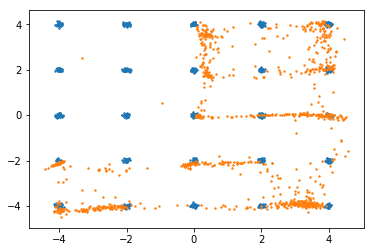

step 10400: discriminator: 1.001e+00, generator: 1.061e+00


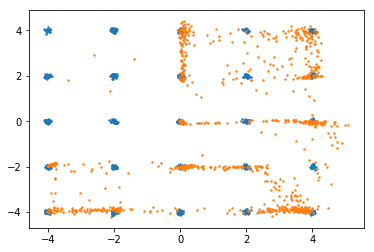

step 10500: discriminator: 1.040e+00, generator: 8.643e-01


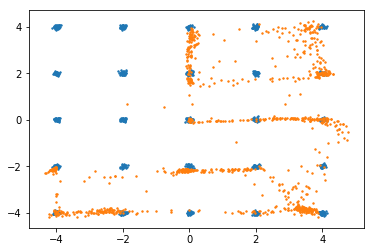

step 10600: discriminator: 1.044e+00, generator: 9.964e-01


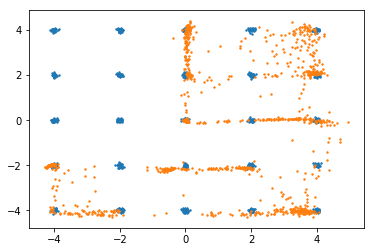

step 10700: discriminator: 1.034e+00, generator: 8.962e-01


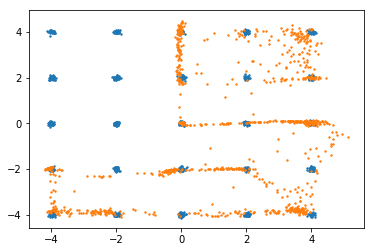

step 10800: discriminator: 9.373e-01, generator: 1.078e+00


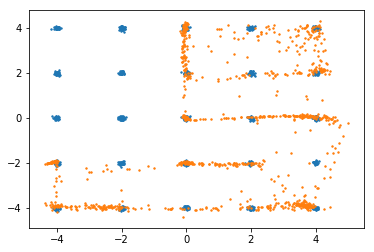

step 10900: discriminator: 1.050e+00, generator: 1.066e+00


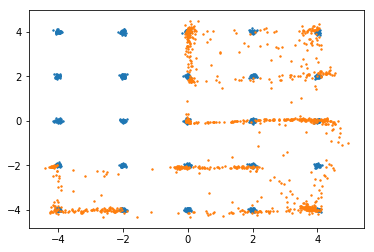

step 11000: discriminator: 9.602e-01, generator: 1.366e+00


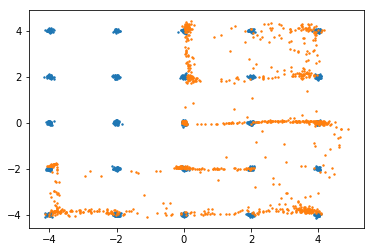

step 11100: discriminator: 1.105e+00, generator: 1.217e+00


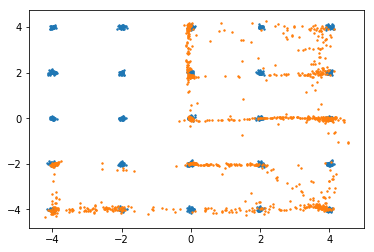

step 11200: discriminator: 1.063e+00, generator: 1.369e+00


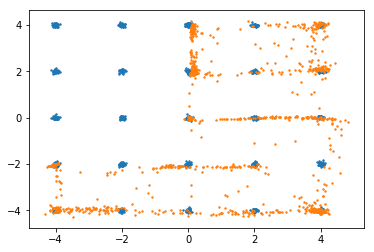

step 11300: discriminator: 1.034e+00, generator: 1.050e+00


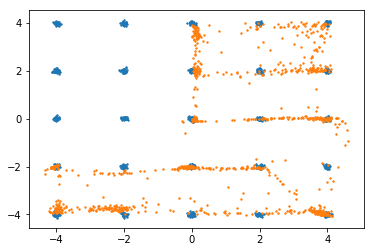

step 11400: discriminator: 1.020e+00, generator: 1.162e+00


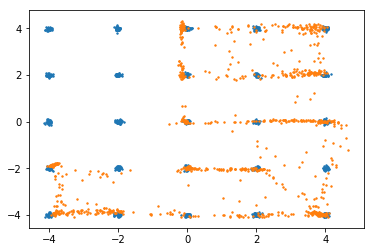

step 11500: discriminator: 9.991e-01, generator: 1.226e+00


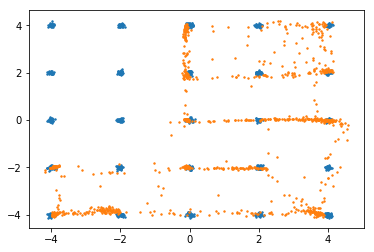

step 11600: discriminator: 9.678e-01, generator: 1.031e+00


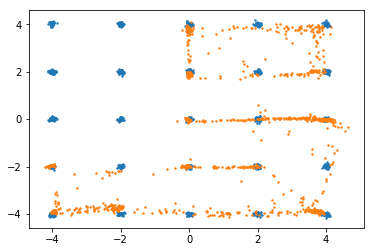

step 11700: discriminator: 1.031e+00, generator: 1.138e+00


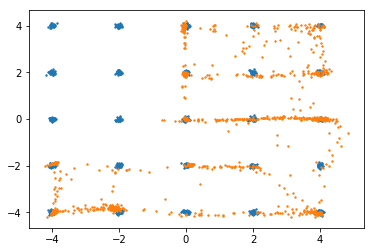

step 11800: discriminator: 9.364e-01, generator: 1.060e+00


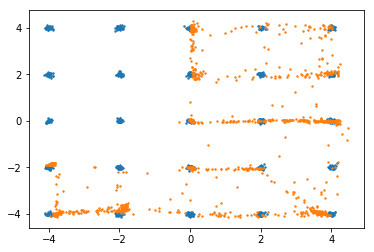

step 11900: discriminator: 9.852e-01, generator: 1.191e+00


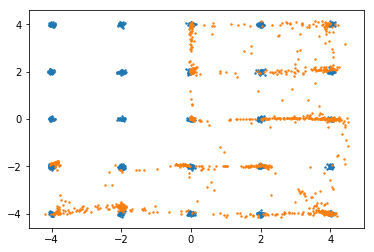

step 12000: discriminator: 1.093e+00, generator: 9.223e-01


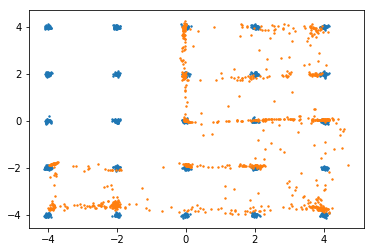

step 12100: discriminator: 1.079e+00, generator: 1.036e+00


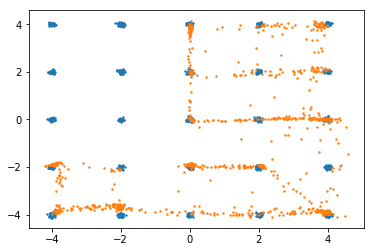

step 12200: discriminator: 1.084e+00, generator: 1.152e+00


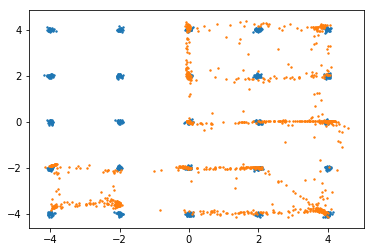

step 12300: discriminator: 1.139e+00, generator: 9.754e-01


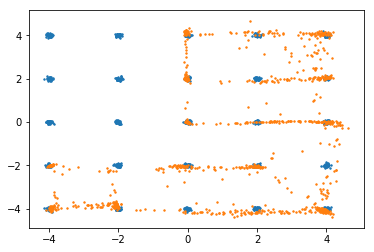

step 12400: discriminator: 1.027e+00, generator: 1.071e+00


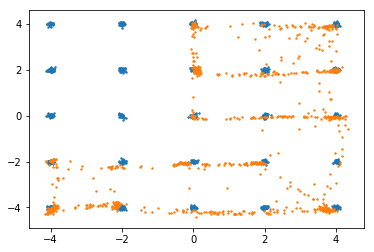

step 12500: discriminator: 1.015e+00, generator: 1.200e+00


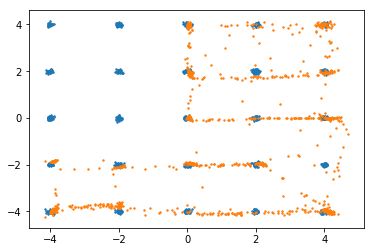

step 12600: discriminator: 1.031e+00, generator: 1.141e+00


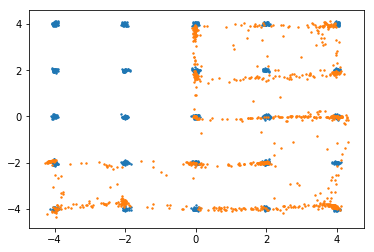

step 12700: discriminator: 1.004e+00, generator: 1.204e+00


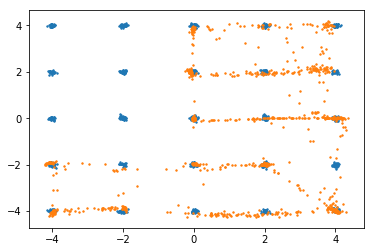

step 12800: discriminator: 9.982e-01, generator: 1.043e+00


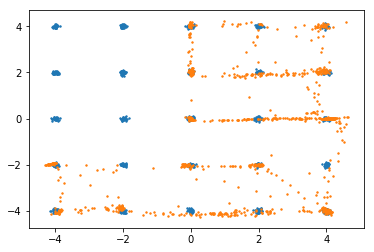

step 12900: discriminator: 1.016e+00, generator: 1.282e+00


step 13000: discriminator: 1.004e+00, generator: 1.591e+00


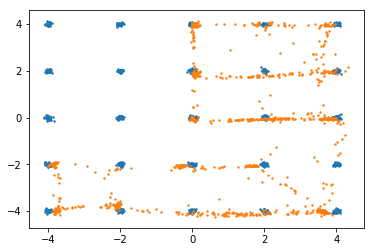

step 13100: discriminator: 9.721e-01, generator: 1.299e+00


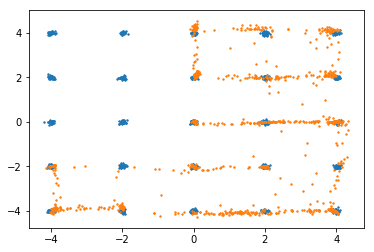

step 13200: discriminator: 9.211e-01, generator: 1.379e+00


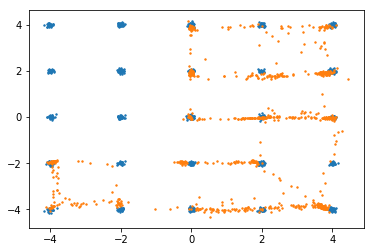

step 13300: discriminator: 1.034e+00, generator: 1.115e+00


step 13400: discriminator: 1.024e+00, generator: 1.216e+00


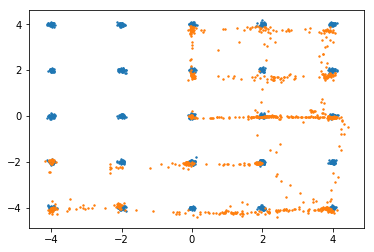

step 13500: discriminator: 1.013e+00, generator: 1.028e+00


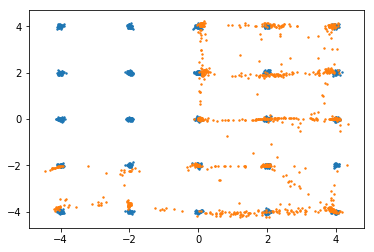

step 13600: discriminator: 9.698e-01, generator: 1.148e+00


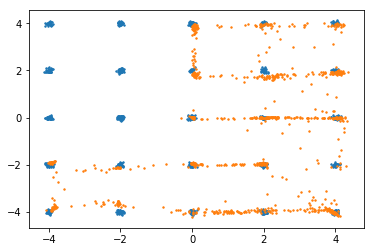

step 13700: discriminator: 1.116e+00, generator: 1.367e+00


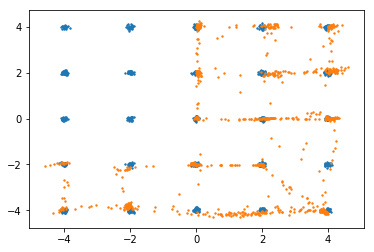

step 13800: discriminator: 9.932e-01, generator: 1.034e+00


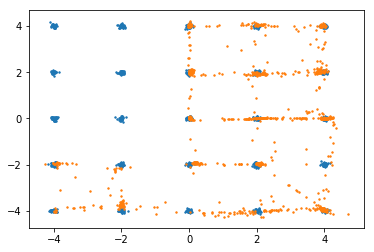

step 13900: discriminator: 1.009e+00, generator: 9.722e-01


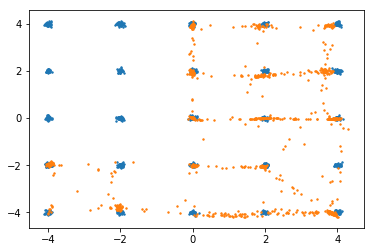

step 14000: discriminator: 1.019e+00, generator: 1.191e+00


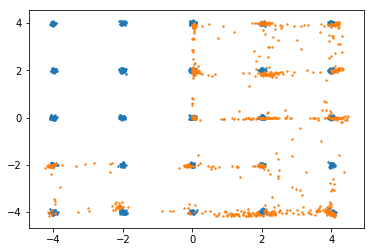

step 14100: discriminator: 9.963e-01, generator: 1.175e+00


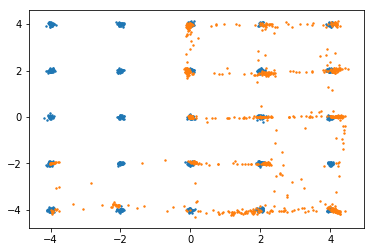

step 14200: discriminator: 1.037e+00, generator: 1.107e+00


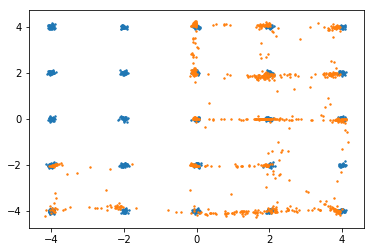

step 14300: discriminator: 1.078e+00, generator: 1.256e+00


step 14400: discriminator: 9.759e-01, generator: 1.416e+00


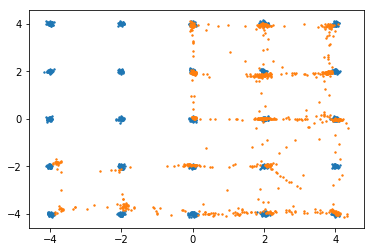

step 14500: discriminator: 9.364e-01, generator: 1.029e+00


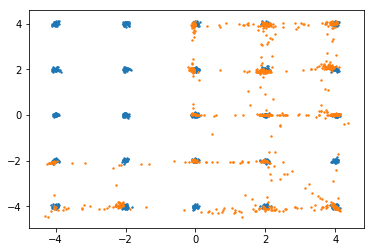

step 14600: discriminator: 1.029e+00, generator: 1.120e+00


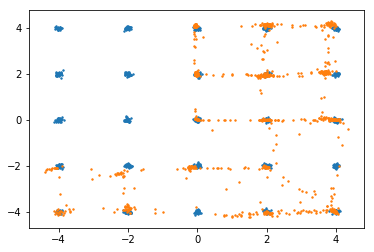

step 14700: discriminator: 1.029e+00, generator: 1.461e+00


step 14800: discriminator: 9.976e-01, generator: 1.137e+00


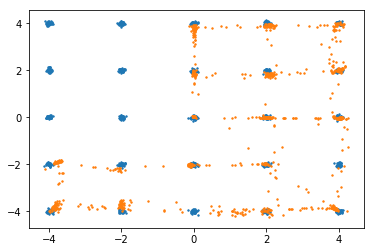

step 14900: discriminator: 1.010e+00, generator: 1.162e+00


step 15000: discriminator: 9.861e-01, generator: 1.389e+00


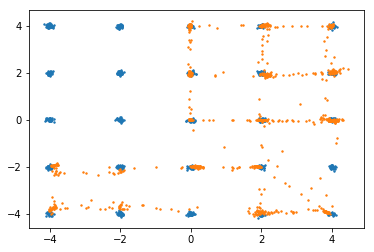

step 15100: discriminator: 1.026e+00, generator: 1.260e+00


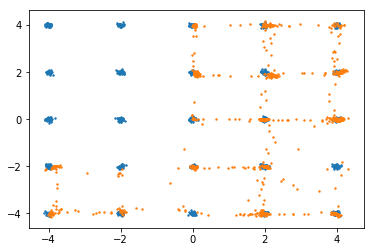

step 15200: discriminator: 9.605e-01, generator: 1.157e+00


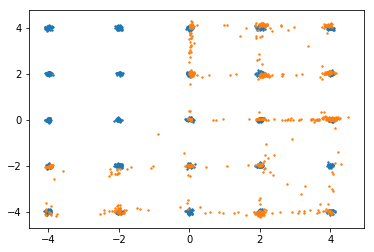

step 15300: discriminator: 9.700e-01, generator: 1.160e+00


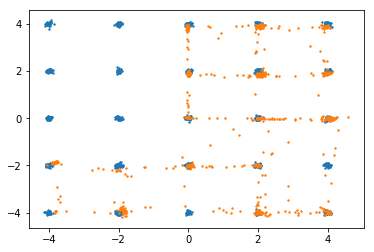

step 15400: discriminator: 1.017e+00, generator: 1.169e+00


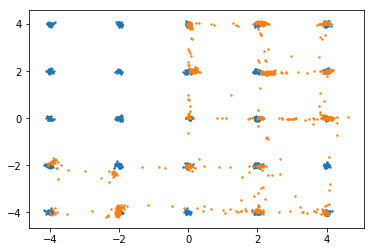

step 15500: discriminator: 1.107e+00, generator: 1.050e+00


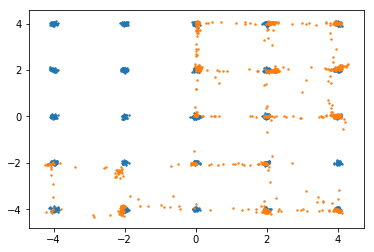

step 15600: discriminator: 9.446e-01, generator: 1.303e+00


step 15700: discriminator: 1.048e+00, generator: 1.389e+00


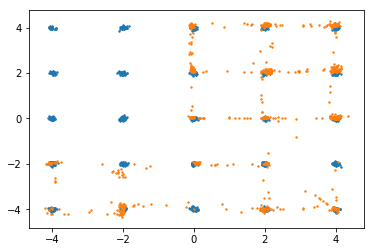

step 15800: discriminator: 1.096e+00, generator: 1.220e+00


step 15900: discriminator: 1.075e+00, generator: 1.167e+00


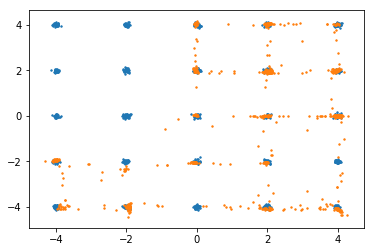

step 16000: discriminator: 1.102e+00, generator: 1.174e+00


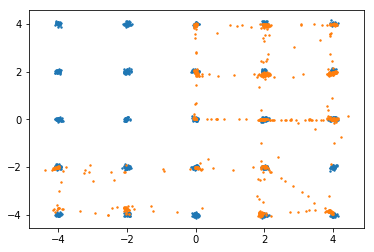

step 16100: discriminator: 1.065e+00, generator: 1.084e+00


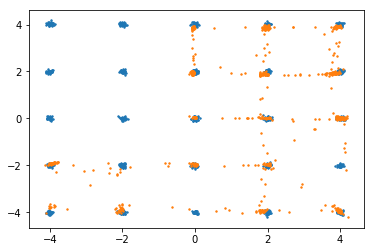

step 16200: discriminator: 1.001e+00, generator: 1.343e+00


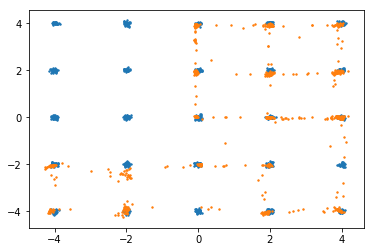

step 16300: discriminator: 1.019e+00, generator: 1.335e+00


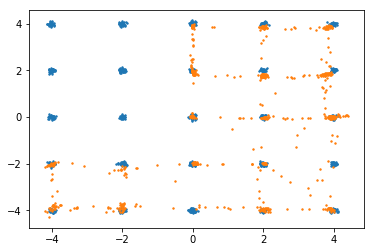

step 16400: discriminator: 1.032e+00, generator: 1.331e+00


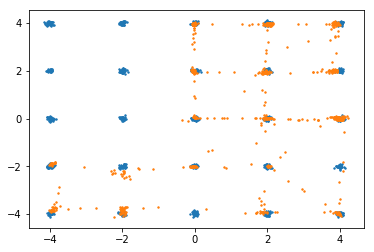

step 16500: discriminator: 9.876e-01, generator: 1.220e+00


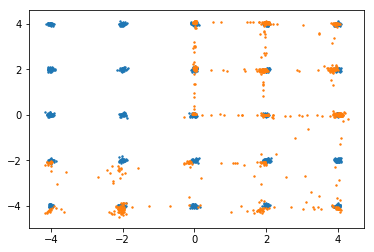

step 16600: discriminator: 1.081e+00, generator: 1.266e+00


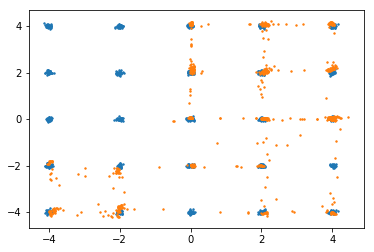

step 16700: discriminator: 1.009e+00, generator: 1.368e+00


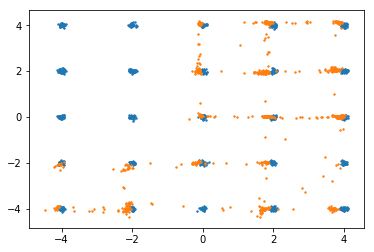

step 16800: discriminator: 9.795e-01, generator: 1.308e+00


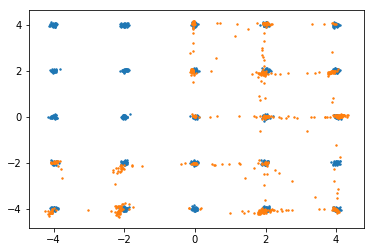

step 16900: discriminator: 9.592e-01, generator: 1.155e+00


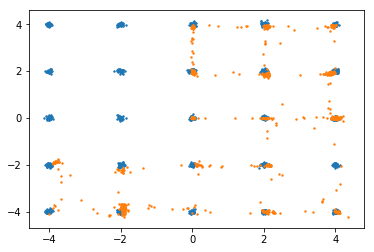

step 17000: discriminator: 9.836e-01, generator: 1.374e+00


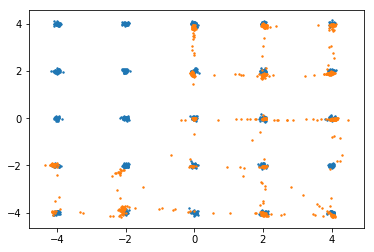

step 17100: discriminator: 1.018e+00, generator: 1.461e+00


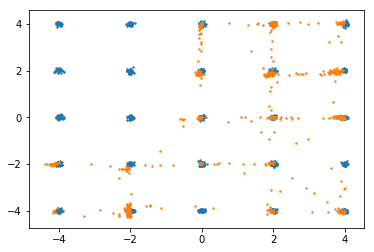

step 17200: discriminator: 9.347e-01, generator: 1.185e+00


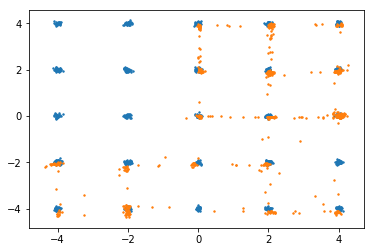

step 17300: discriminator: 9.347e-01, generator: 1.440e+00


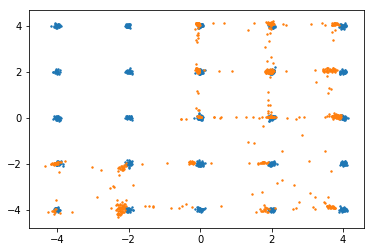

step 17400: discriminator: 9.639e-01, generator: 1.455e+00


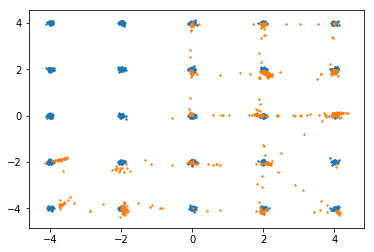

step 17500: discriminator: 9.681e-01, generator: 1.316e+00


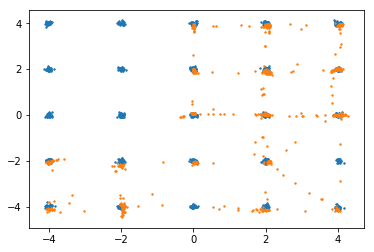

step 17600: discriminator: 1.004e+00, generator: 1.480e+00


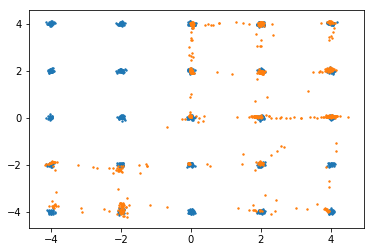

step 17700: discriminator: 9.384e-01, generator: 1.260e+00


step 17800: discriminator: 9.269e-01, generator: 1.360e+00


step 17900: discriminator: 9.036e-01, generator: 1.160e+00


step 18000: discriminator: 1.097e+00, generator: 1.486e+00


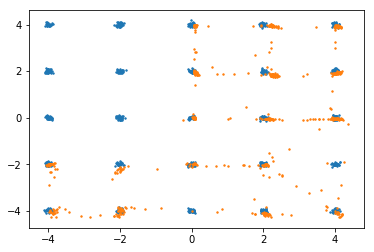

step 18100: discriminator: 9.883e-01, generator: 1.166e+00


step 18200: discriminator: 1.006e+00, generator: 1.048e+00


step 18300: discriminator: 9.978e-01, generator: 1.435e+00


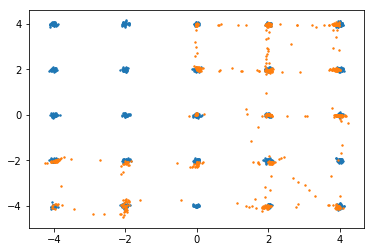

step 18400: discriminator: 1.002e+00, generator: 1.168e+00


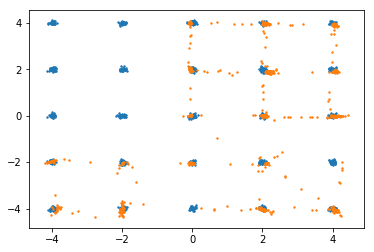

step 18500: discriminator: 1.067e+00, generator: 1.293e+00


step 18600: discriminator: 1.072e+00, generator: 1.178e+00


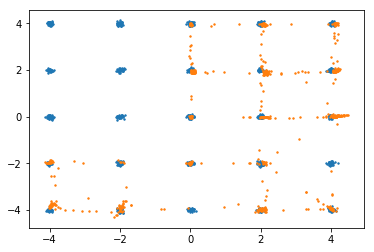

step 18700: discriminator: 1.073e+00, generator: 1.086e+00


step 18800: discriminator: 1.015e+00, generator: 1.310e+00


step 18900: discriminator: 1.031e+00, generator: 1.101e+00


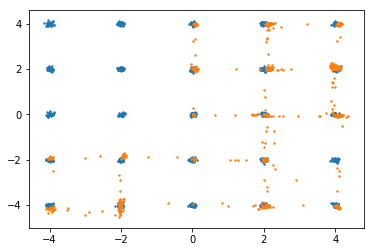

step 19000: discriminator: 1.206e+00, generator: 1.470e+00


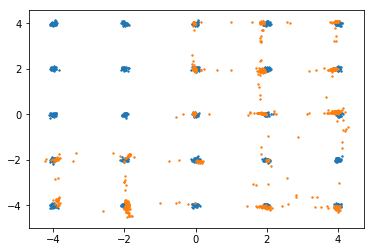

step 19100: discriminator: 1.032e+00, generator: 1.147e+00


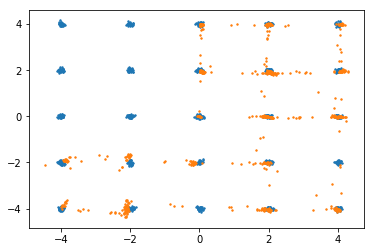

step 19200: discriminator: 1.033e+00, generator: 1.225e+00


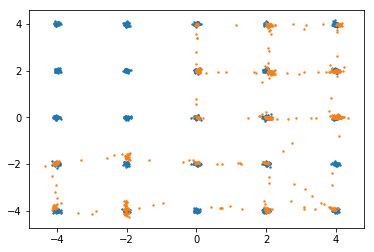

step 19300: discriminator: 9.379e-01, generator: 1.329e+00


step 19400: discriminator: 9.208e-01, generator: 1.462e+00


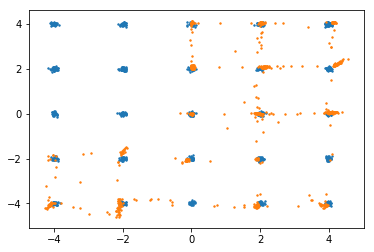

step 19500: discriminator: 9.179e-01, generator: 1.256e+00


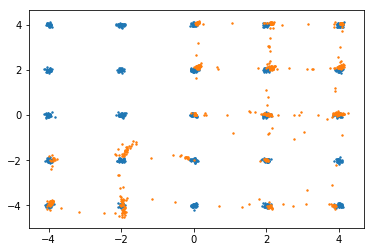

step 19600: discriminator: 8.477e-01, generator: 1.462e+00


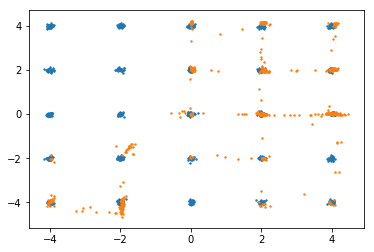

step 19700: discriminator: 1.023e+00, generator: 1.373e+00


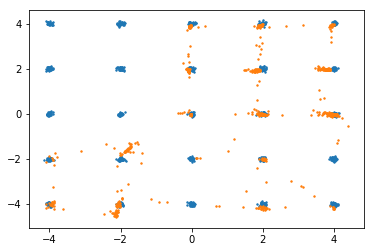

step 19800: discriminator: 1.088e+00, generator: 1.261e+00


step 19900: discriminator: 9.355e-01, generator: 1.256e+00


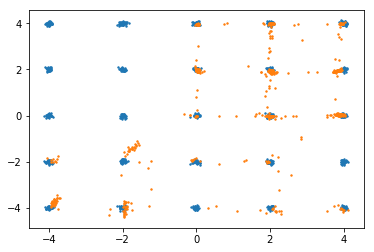

step 20000: discriminator: 9.816e-01, generator: 1.362e+00


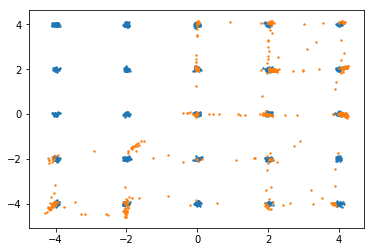

In [0]:
# Number of times to train the discriminator between two generator steps
TRAIN_RATIO = 1

# Total number of training iterations for the generator
N_ITER = 20001

# Batch size to use
BATCHLEN = 128

generator = Generator()
optim_gen = torch.optim.Adam(generator.parameters(), lr=0.0005, betas=(0.5,0.9))
discriminator = Discriminator()
optim_disc = torch.optim.Adam(discriminator.parameters(), lr=0.0005, betas=(0.5,0.9))

softplus = torch.nn.Softplus()
loss_gen_history = []

for i in range(N_ITER):
    # train the discriminator
    for _ in range(TRAIN_RATIO):
        discriminator.zero_grad()
        real_batch = generate_batch(BATCHLEN)
        fake_batch = generator.generate(BATCHLEN)        
        # REAL DATA
        disc_loss = torch.sum(torch.nn.Softplus(beta=1)(-discriminator(real_batch)))/BATCHLEN + torch.sum(torch.nn.Softplus(beta=1)(discriminator(fake_batch)))/BATCHLEN
        # FAKE DATA
        disc_loss.backward()
        optim_disc.step()
        
    # train the generator
    generator.zero_grad()
    fake_batch = generator.generate(BATCHLEN)
    
    # Compute here the generator loss, using fake_batch
    gen_loss = torch.sum(torch.nn.Softplus(beta=1)(-discriminator(fake_batch)))/BATCHLEN
    gen_loss.backward()
    optim_gen.step()
    
    # plot the result
    if i%100 == 0:
        loss_gen_history.append(gen_loss)
        print('step {}: discriminator: {:.3e}, generator: {:.3e}'.format(i, float(disc_loss), float(gen_loss)))
        real_batch = generate_batch(1024)
        fake_batch = generator.generate(1024).detach()
        plt.scatter(real_batch[:,0], real_batch[:,1], s=2.0, label='real data')
        plt.scatter(fake_batch[:,0], fake_batch[:,1], s=2.0, label='fake data')
        plt.show()

# 2) Variational AutoEncoders

In [0]:
# Latent dimension
LATENT_N = 25

# Define the generator
class Encoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 280)
        self.fc2 = nn.Linear(280, 140)
        self.fc3 = nn.Linear(140, 70)
        self.fc4 = nn.Linear(70, 35)
        self.fc_mu = nn.Linear(35, LATENT_N) 
        self.fc_logvar = nn.Linear(35, LATENT_N) 
        
    # encode a datapoint. This should return a couple of tensors (mu, logvar) representing
    # the parameters of the gaussian q_\phi(z | x)
    def __call__(self, x):
        h_1 = F.relu(self.fc1(x))
        h_2 = F.relu(self.fc2(h_1))
        h_3 = F.relu(self.fc3(h_2))
        h_4 = F.relu(self.fc4(h_3))
        mu = self.fc_mu(h_4)
        logvar = self.fc_logvar(h_4)
        return (mu, logvar)
    

# Define the discriminator
class Decoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(LATENT_N, 35) 
        self.fc2 = nn.Linear(35, 70)
        self.fc3 = nn.Linear(70, 140)
        self.fc4 = nn.Linear(140, 280)
        self.fc_mu = nn.Linear(280, 2)
        self.fc_logvar = nn.Linear(280, 2)
    def __call__(self, z):
        h_1 = F.relu(self.fc1(z)) 
        h_2 = F.relu(self.fc2(h_1))
        h_3 = F.relu(self.fc3(h_2))
        h_4 = F.relu(self.fc4(h_3))
        mu = self.fc_mu(h_4)
        logvar = self.fc_logvar(h_4)
        return (mu, logvar)

    def generate(self, batchlen):
        z = torch.normal(torch.zeros(batchlen, LATENT_N), 1.0)
        (mu, logvar) = self.__call__(z)
        return torch.normal(mu, torch.exp(0.5*logvar))

step 0: KL: 1.621e+03, rec: 1.028e+03


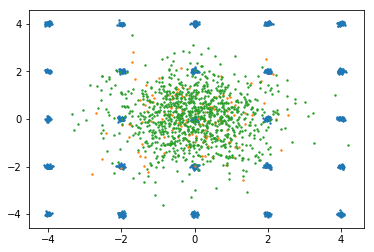

step 100: KL: 1.589e+03, rec: 8.289e+02


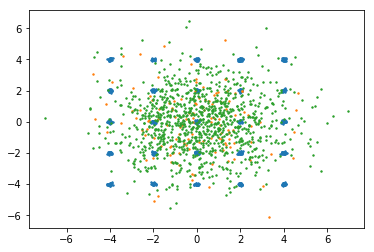

step 200: KL: 1.591e+03, rec: 8.851e+02


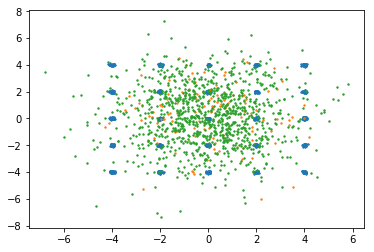

step 300: KL: 1.592e+03, rec: 8.859e+02


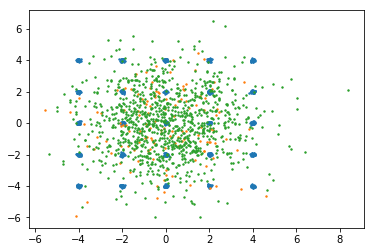

step 400: KL: 1.782e+03, rec: 5.418e+02


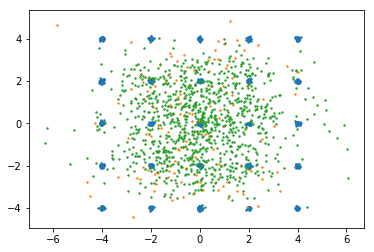

step 500: KL: 1.818e+03, rec: 3.794e+02


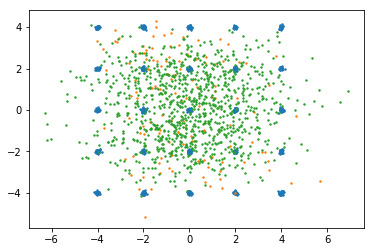

step 600: KL: 1.952e+03, rec: -2.991e+01


step 700: KL: 2.185e+03, rec: -6.186e+02


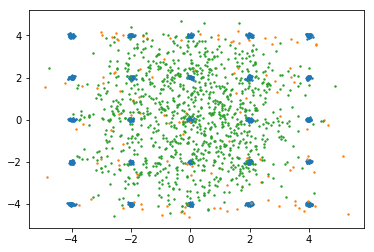

step 800: KL: 2.203e+03, rec: -7.062e+02


step 900: KL: 2.293e+03, rec: -8.433e+02


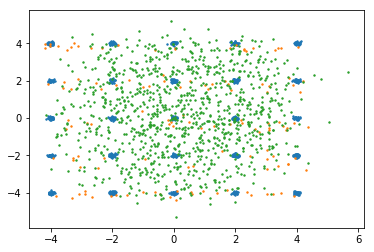

step 1000: KL: 2.373e+03, rec: -9.028e+02


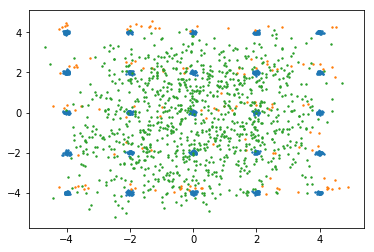

step 1100: KL: 2.377e+03, rec: -1.396e+03


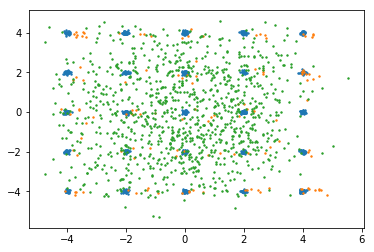

step 1200: KL: 2.353e+03, rec: -1.549e+03


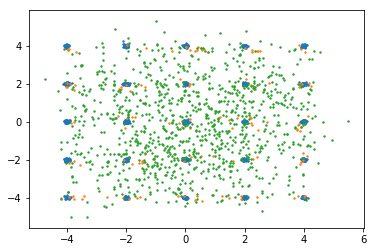

step 1300: KL: 2.363e+03, rec: -1.166e+03


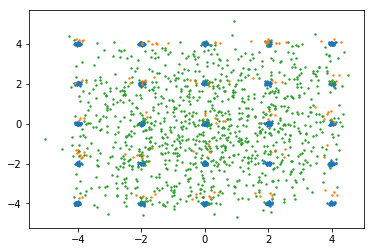

step 1400: KL: 2.378e+03, rec: -1.794e+03


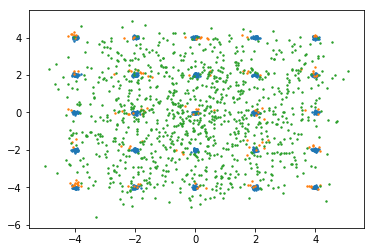

step 1500: KL: 2.412e+03, rec: -1.892e+03


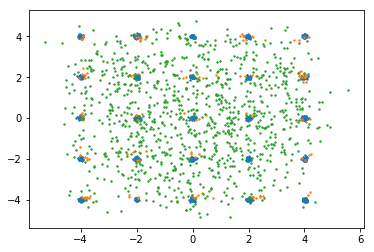

step 1600: KL: 2.366e+03, rec: -1.893e+03


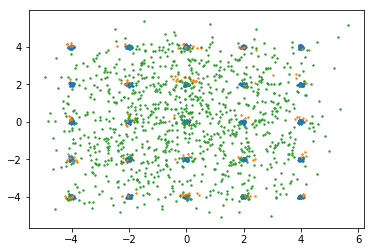

step 1700: KL: 2.402e+03, rec: -2.121e+03


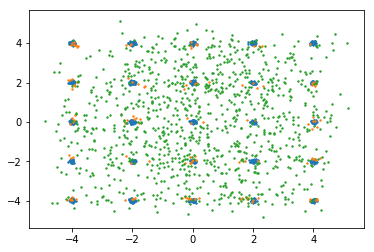

step 1800: KL: 2.395e+03, rec: -2.096e+03


step 1900: KL: 2.427e+03, rec: -2.190e+03


step 2000: KL: 2.404e+03, rec: -1.327e+03


step 2100: KL: 2.454e+03, rec: -1.443e+03


step 2200: KL: 2.409e+03, rec: -1.976e+03


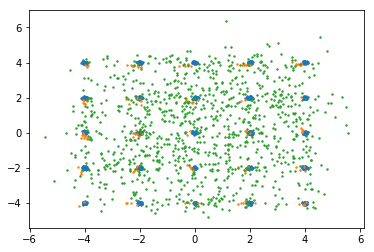

step 2300: KL: 2.454e+03, rec: -2.283e+03


step 2400: KL: 2.433e+03, rec: -1.579e+03


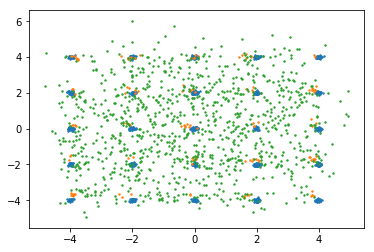

step 2500: KL: 2.451e+03, rec: -2.398e+03


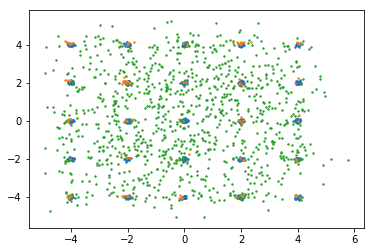

step 2600: KL: 2.423e+03, rec: -2.366e+03


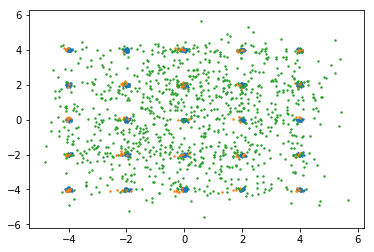

step 2700: KL: 2.426e+03, rec: -1.486e+03


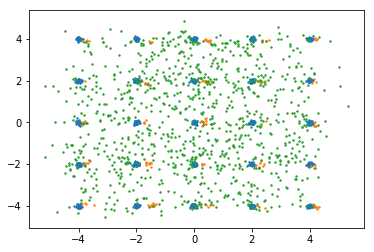

step 2800: KL: 2.439e+03, rec: -2.378e+03


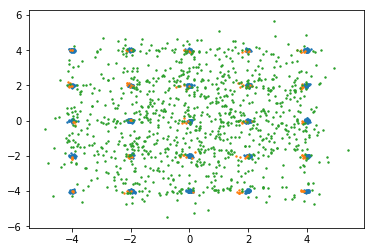

step 2900: KL: 2.442e+03, rec: -2.416e+03


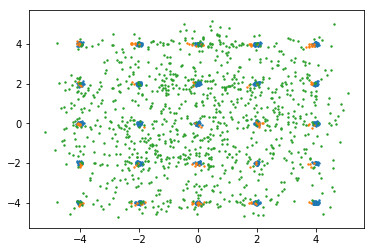

step 3000: KL: 2.416e+03, rec: -2.337e+03


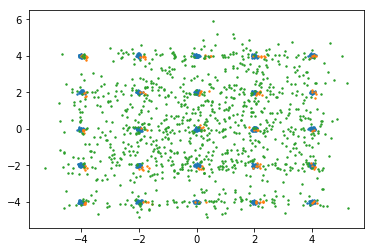

step 3100: KL: 2.448e+03, rec: -2.249e+03


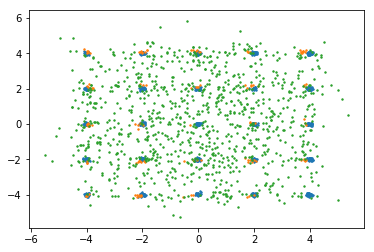

step 3200: KL: 2.458e+03, rec: -2.544e+03


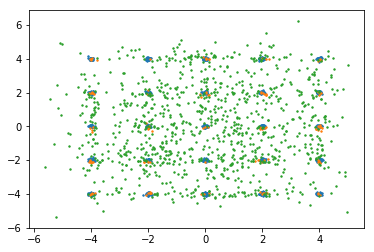

step 3300: KL: 2.447e+03, rec: -2.078e+03


step 3400: KL: 2.430e+03, rec: -2.174e+03


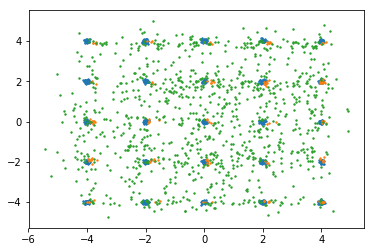

step 3500: KL: 2.438e+03, rec: -9.491e+02


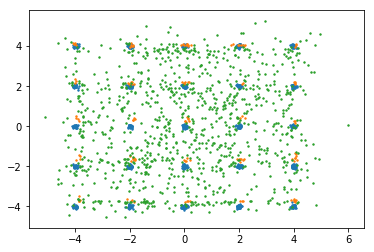

step 3600: KL: 2.438e+03, rec: -2.082e+03


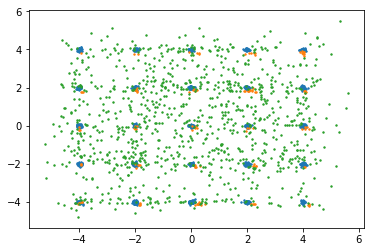

step 3700: KL: 2.415e+03, rec: -2.711e+03


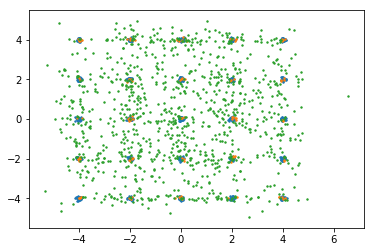

step 3800: KL: 2.468e+03, rec: -2.577e+03


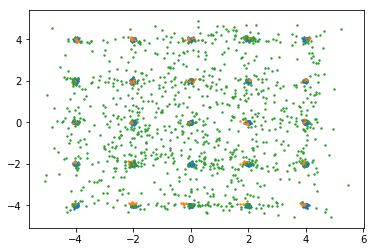

step 3900: KL: 2.422e+03, rec: -2.662e+03


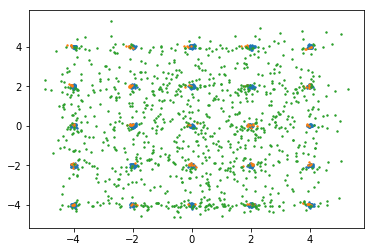

step 4000: KL: 2.445e+03, rec: -2.232e+03


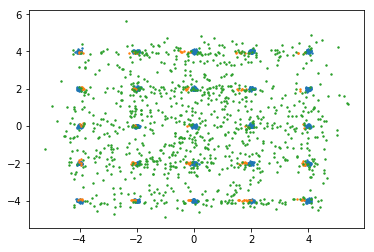

step 4100: KL: 2.428e+03, rec: -2.225e+03


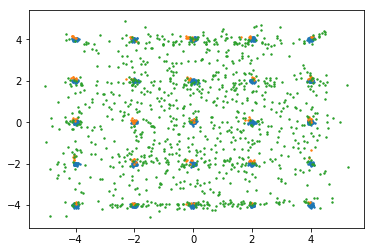

step 4200: KL: 2.409e+03, rec: -2.071e+03


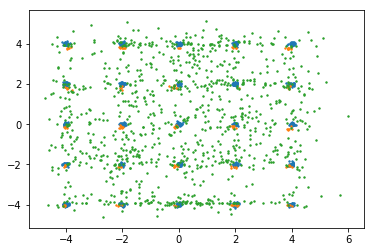

step 4300: KL: 2.392e+03, rec: -2.777e+03


step 4400: KL: 2.407e+03, rec: -2.747e+03


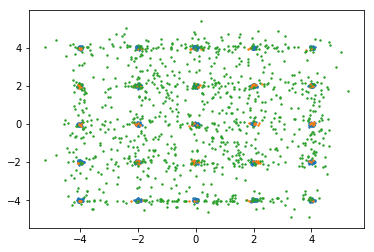

step 4500: KL: 2.412e+03, rec: -2.762e+03


step 4600: KL: 2.424e+03, rec: -2.631e+03


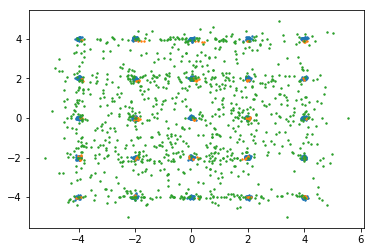

step 4700: KL: 2.391e+03, rec: -2.794e+03


step 4800: KL: 2.384e+03, rec: -2.530e+03


step 4900: KL: 2.358e+03, rec: -2.471e+03


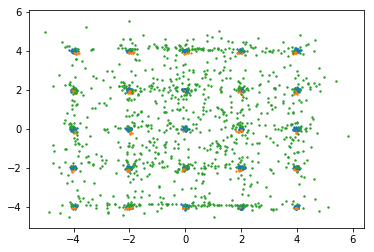

step 5000: KL: 2.462e+03, rec: -2.679e+03


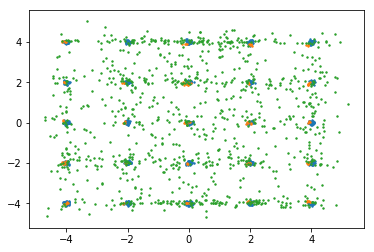

step 5100: KL: 2.362e+03, rec: -2.750e+03


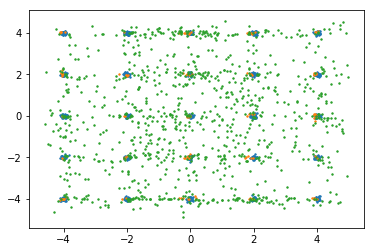

step 5200: KL: 2.372e+03, rec: -2.614e+03


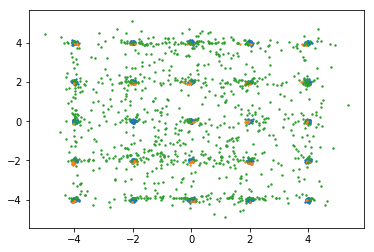

step 5300: KL: 2.364e+03, rec: -2.620e+03


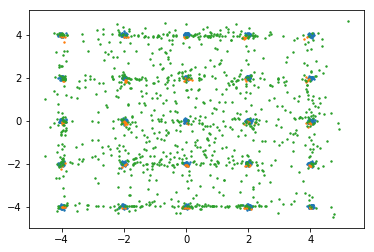

step 5400: KL: 2.392e+03, rec: -2.828e+03


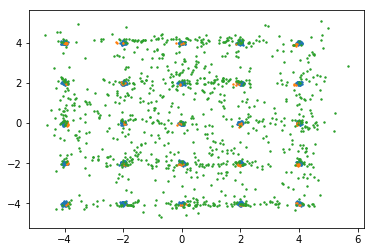

step 5500: KL: 2.390e+03, rec: -2.199e+03


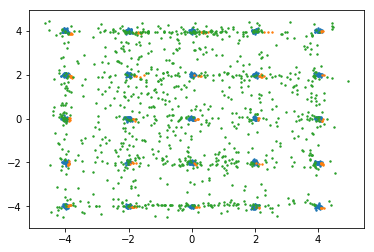

step 5600: KL: 2.369e+03, rec: -2.325e+03


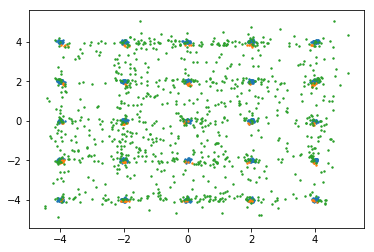

step 5700: KL: 2.387e+03, rec: -2.592e+03


step 5800: KL: 2.370e+03, rec: -2.654e+03


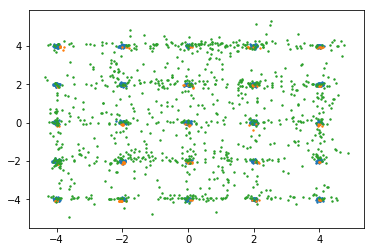

step 5900: KL: 2.390e+03, rec: -2.259e+03


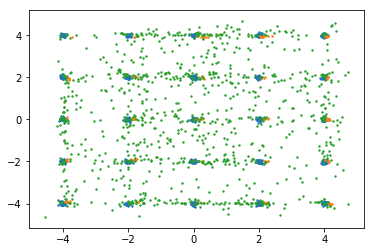

step 6000: KL: 2.352e+03, rec: -2.902e+03


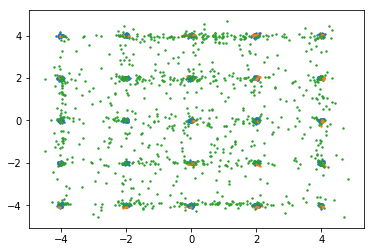

step 6100: KL: 2.357e+03, rec: -2.265e+03


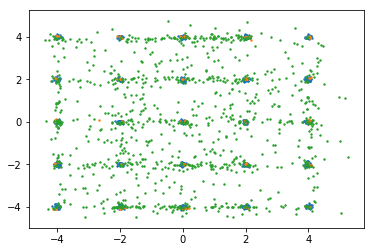

step 6200: KL: 2.371e+03, rec: -2.870e+03


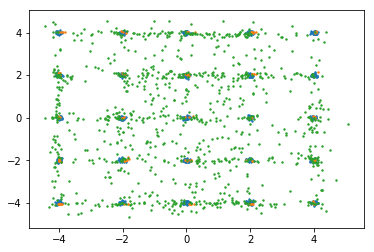

step 6300: KL: 2.391e+03, rec: -2.755e+03


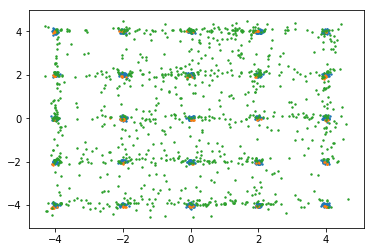

step 6400: KL: 2.361e+03, rec: -2.945e+03


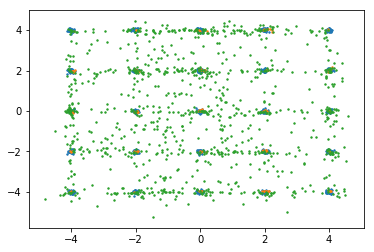

step 6500: KL: 2.357e+03, rec: -2.932e+03


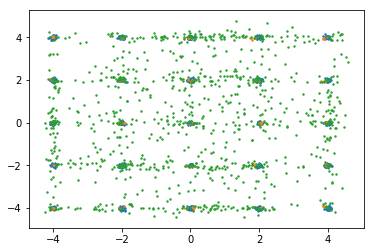

step 6600: KL: 2.385e+03, rec: -2.767e+03


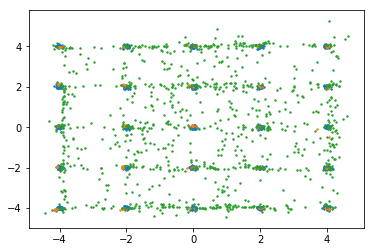

step 6700: KL: 2.343e+03, rec: -2.248e+03


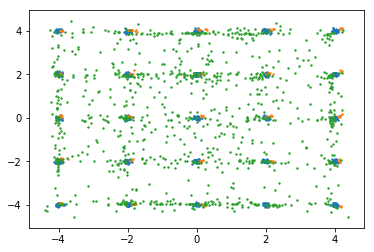

step 6800: KL: 2.357e+03, rec: -2.574e+03


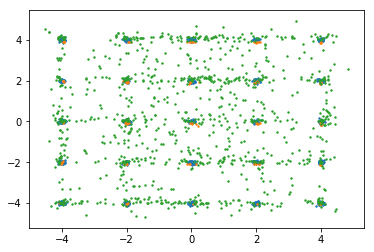

step 6900: KL: 2.345e+03, rec: -2.819e+03


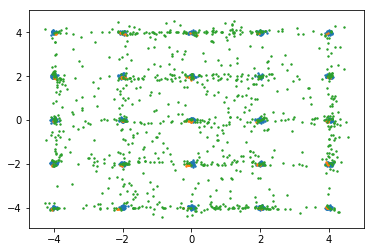

step 7000: KL: 2.334e+03, rec: -2.478e+03


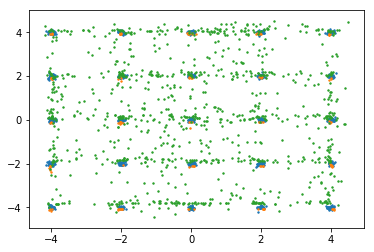

step 7100: KL: 2.356e+03, rec: -2.975e+03


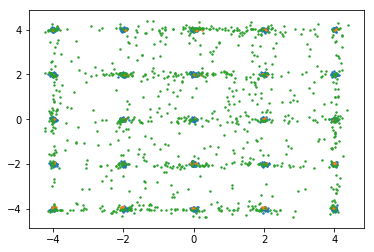

step 7200: KL: 2.298e+03, rec: -2.778e+03


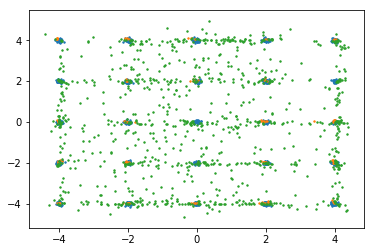

step 7300: KL: 2.325e+03, rec: -2.983e+03


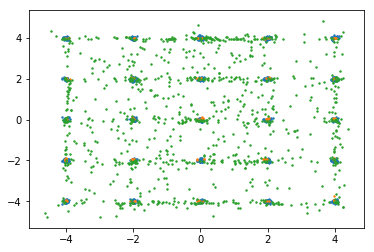

step 7400: KL: 2.331e+03, rec: -3.047e+03


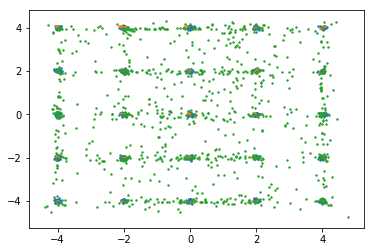

step 7500: KL: 2.343e+03, rec: -2.577e+03


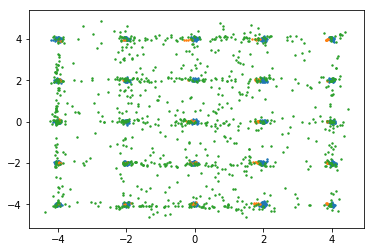

step 7600: KL: 2.324e+03, rec: -2.921e+03


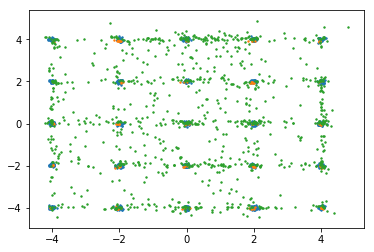

step 7700: KL: 2.346e+03, rec: -2.312e+03


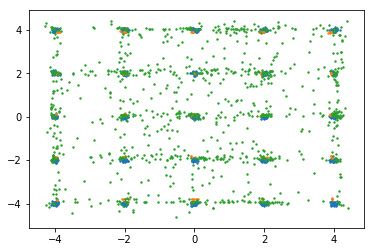

step 7800: KL: 2.306e+03, rec: -2.702e+03


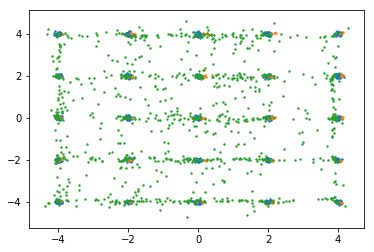

step 7900: KL: 2.322e+03, rec: -2.803e+03


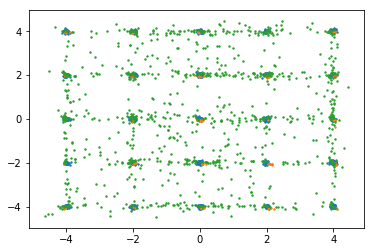

step 8000: KL: 2.357e+03, rec: -3.038e+03


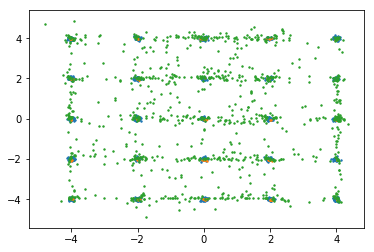

step 8100: KL: 2.318e+03, rec: -2.941e+03


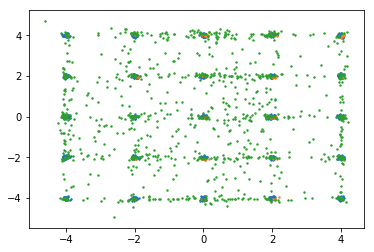

step 8200: KL: 2.337e+03, rec: -2.841e+03


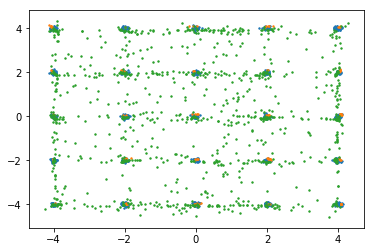

step 8300: KL: 2.346e+03, rec: -2.953e+03


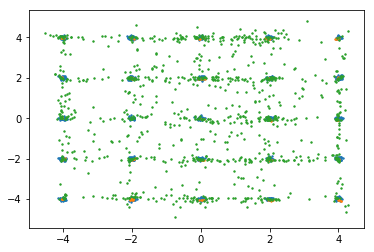

step 8400: KL: 2.371e+03, rec: -2.949e+03


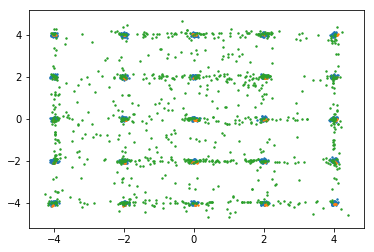

step 8500: KL: 2.317e+03, rec: -2.794e+03


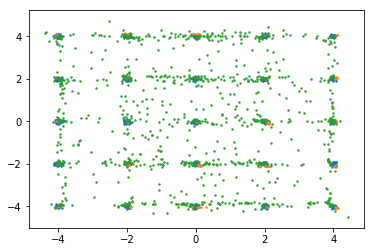

step 8600: KL: 2.346e+03, rec: -3.015e+03


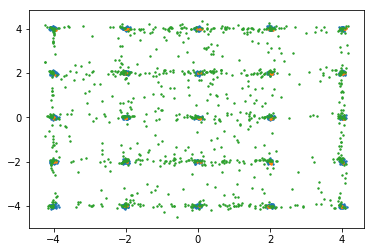

step 8700: KL: 2.297e+03, rec: -3.015e+03


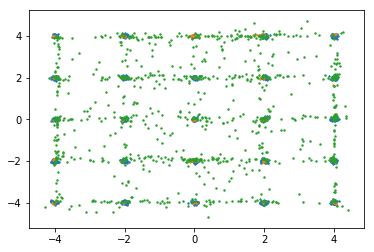

step 8800: KL: 2.349e+03, rec: -3.083e+03


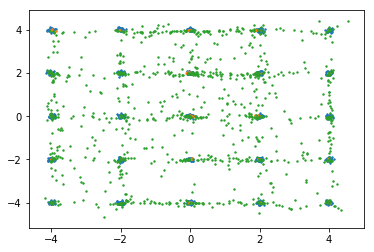

step 8900: KL: 2.294e+03, rec: -2.658e+03


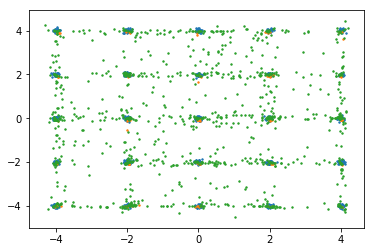

step 9000: KL: 2.321e+03, rec: -2.784e+03


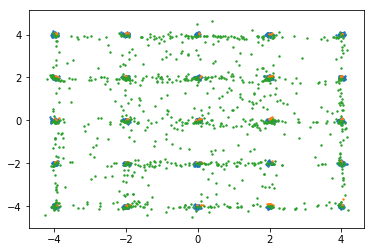

step 9100: KL: 2.314e+03, rec: -2.830e+03


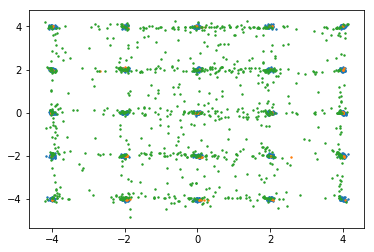

step 9200: KL: 2.318e+03, rec: -3.057e+03


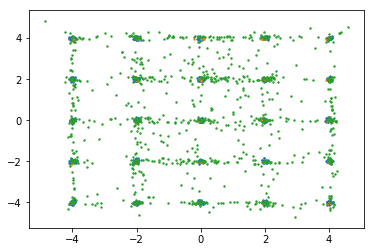

step 9300: KL: 2.306e+03, rec: -2.875e+03


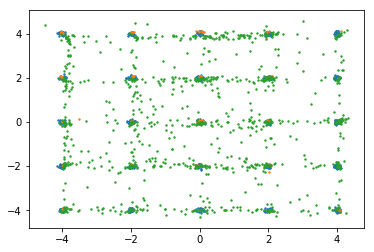

step 9400: KL: 2.318e+03, rec: -2.925e+03


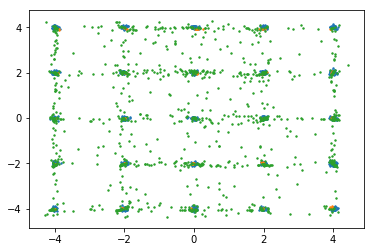

step 9500: KL: 2.344e+03, rec: -2.789e+03


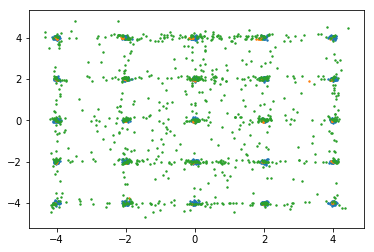

step 9600: KL: 2.311e+03, rec: -2.919e+03


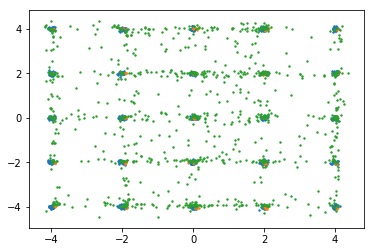

step 9700: KL: 2.325e+03, rec: -2.794e+03


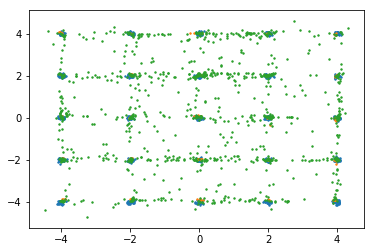

step 9800: KL: 2.329e+03, rec: -2.652e+03


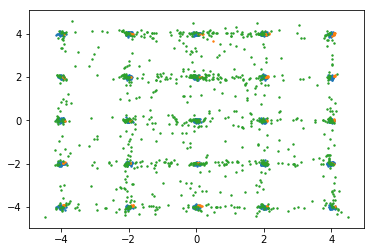

step 9900: KL: 2.336e+03, rec: -2.490e+03


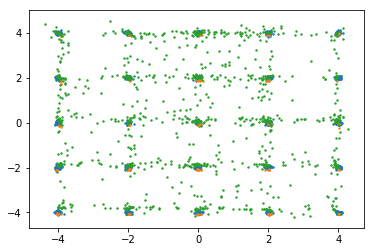

step 10000: KL: 2.350e+03, rec: -2.969e+03


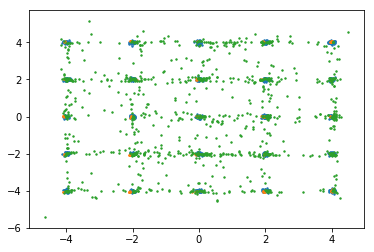

step 10100: KL: 2.327e+03, rec: -2.995e+03


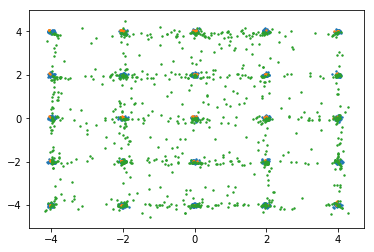

step 10200: KL: 2.366e+03, rec: -2.111e+03


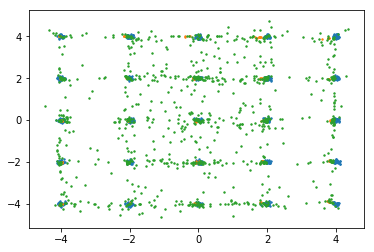

step 10300: KL: 2.340e+03, rec: -3.029e+03


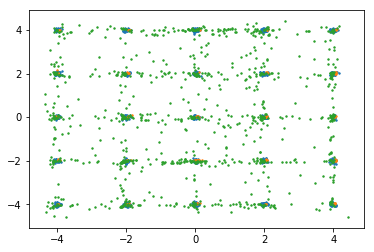

step 10400: KL: 2.289e+03, rec: -2.968e+03


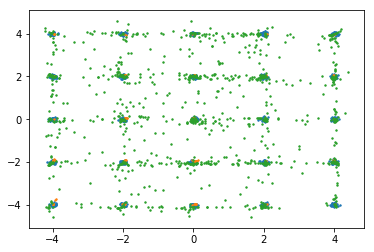

step 10500: KL: 2.338e+03, rec: -3.048e+03


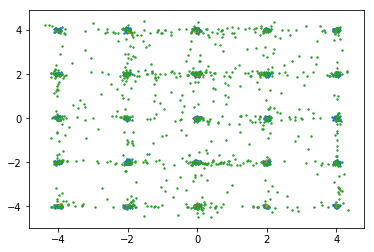

step 10600: KL: 2.347e+03, rec: -2.958e+03


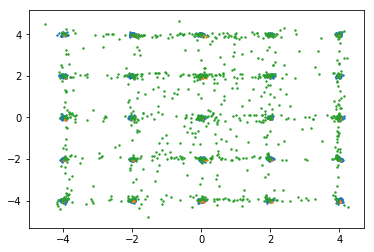

step 10700: KL: 2.348e+03, rec: -3.078e+03


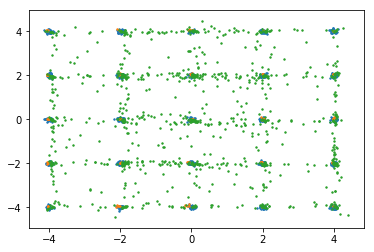

step 10800: KL: 2.356e+03, rec: -2.474e+03


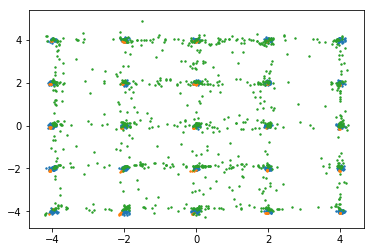

step 10900: KL: 2.352e+03, rec: -2.937e+03


step 11000: KL: 2.346e+03, rec: -2.589e+03


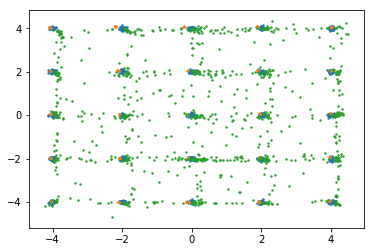

step 11100: KL: 2.354e+03, rec: -2.697e+03


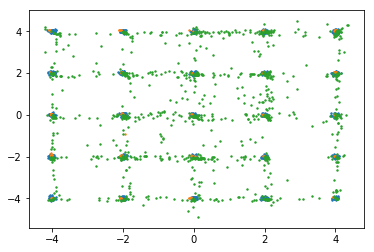

step 11200: KL: 2.364e+03, rec: -3.098e+03


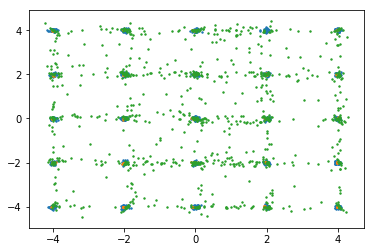

step 11300: KL: 2.322e+03, rec: -3.089e+03


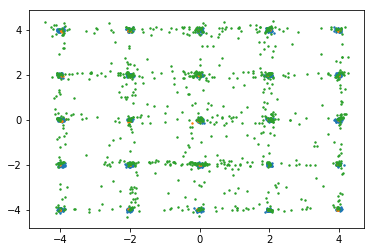

step 11400: KL: 2.321e+03, rec: -2.901e+03


step 11500: KL: 2.350e+03, rec: -3.147e+03


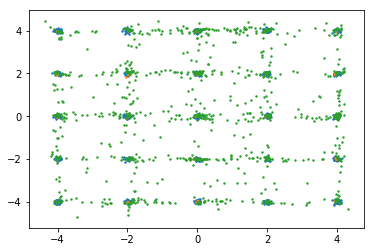

step 11600: KL: 2.371e+03, rec: -3.095e+03


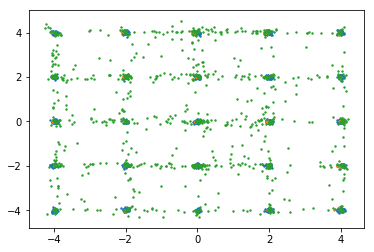

step 11700: KL: 2.340e+03, rec: -2.407e+03


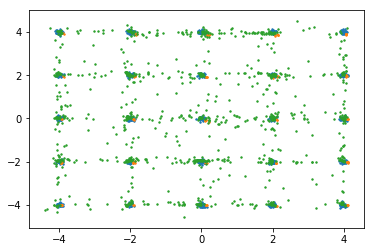

step 11800: KL: 2.277e+03, rec: -2.973e+03


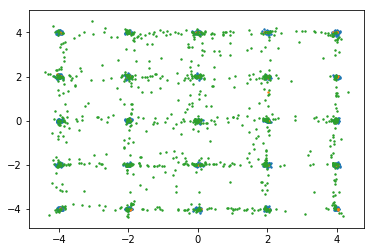

step 11900: KL: 2.300e+03, rec: -3.087e+03


step 12000: KL: 2.333e+03, rec: -2.914e+03


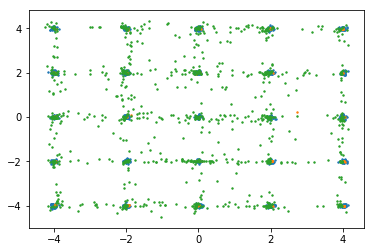

step 12100: KL: 2.326e+03, rec: -3.053e+03


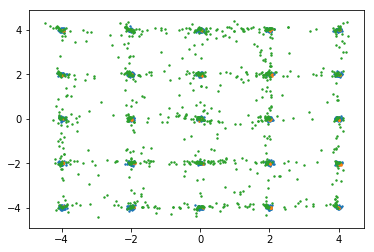

step 12200: KL: 2.284e+03, rec: -2.930e+03


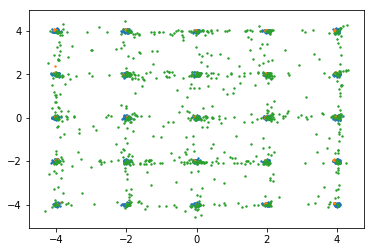

step 12300: KL: 2.344e+03, rec: -3.135e+03


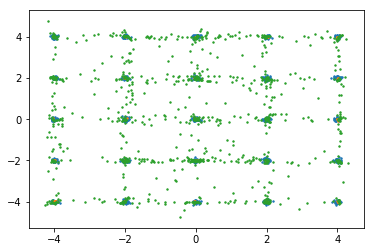

step 12400: KL: 2.329e+03, rec: -2.866e+03


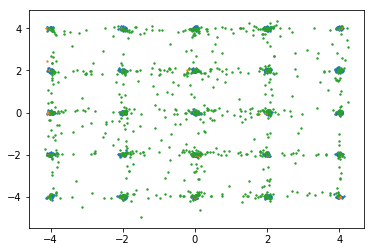

step 12500: KL: 2.323e+03, rec: -3.052e+03


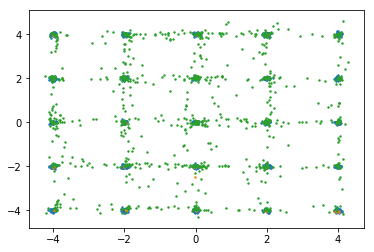

step 12600: KL: 2.308e+03, rec: -3.112e+03


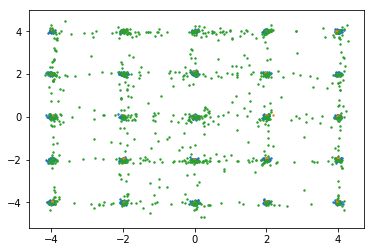

step 12700: KL: 2.309e+03, rec: -3.088e+03


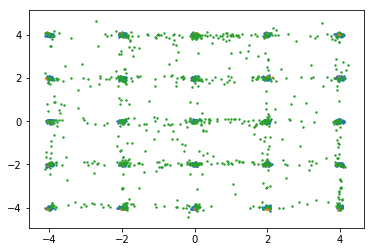

step 12800: KL: 2.348e+03, rec: -3.079e+03


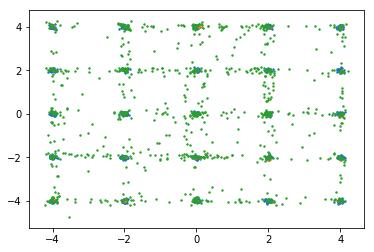

step 12900: KL: 2.382e+03, rec: -3.002e+03


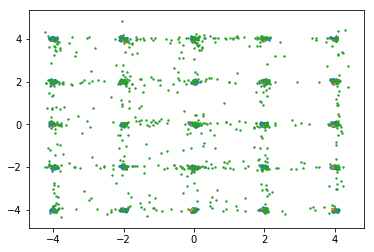

step 13000: KL: 2.349e+03, rec: -3.067e+03


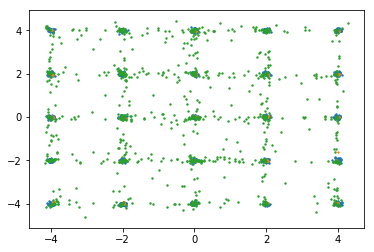

step 13100: KL: 2.347e+03, rec: -2.906e+03


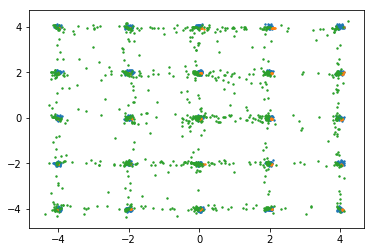

step 13200: KL: 2.324e+03, rec: -3.109e+03


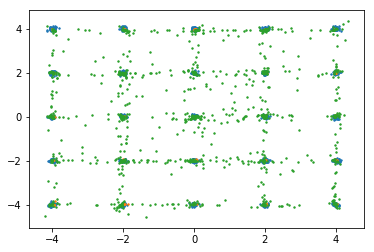

step 13300: KL: 2.407e+03, rec: -3.135e+03


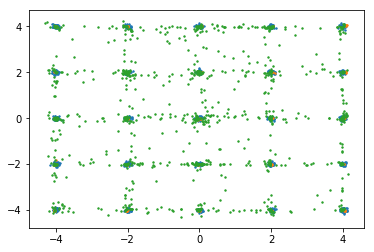

step 13400: KL: 2.318e+03, rec: -3.105e+03


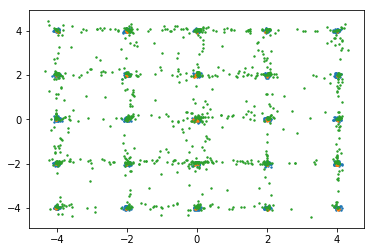

step 13500: KL: 2.379e+03, rec: -3.122e+03


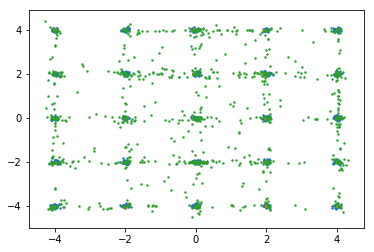

step 13600: KL: 2.387e+03, rec: -2.933e+03


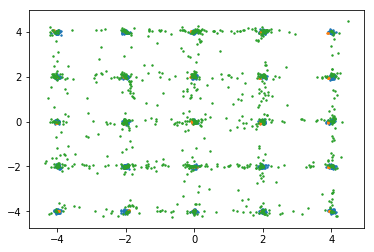

step 13700: KL: 2.324e+03, rec: -2.762e+03


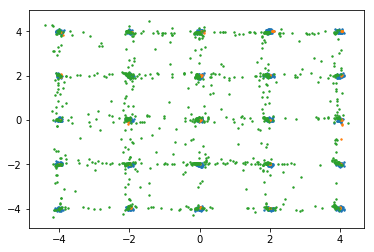

step 13800: KL: 2.343e+03, rec: -2.966e+03


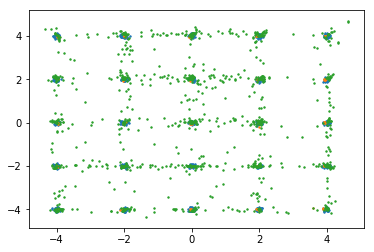

step 13900: KL: 2.425e+03, rec: -2.955e+03


step 14000: KL: 2.408e+03, rec: -2.934e+03


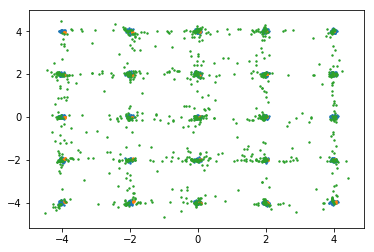

step 14100: KL: 2.285e+03, rec: -2.985e+03


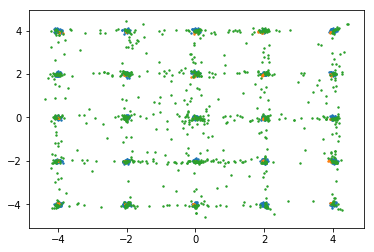

step 14200: KL: 2.344e+03, rec: -2.951e+03


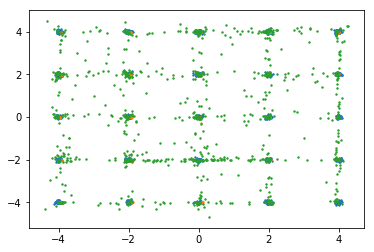

step 14300: KL: 2.368e+03, rec: -3.068e+03


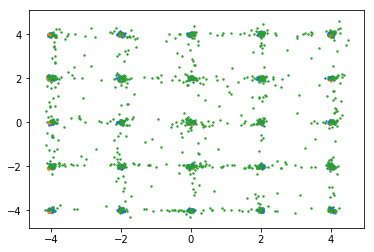

step 14400: KL: 2.320e+03, rec: -3.132e+03


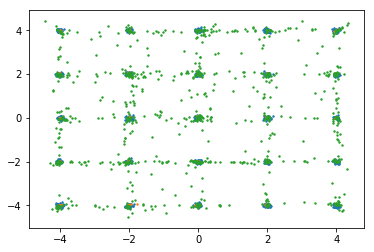

step 14500: KL: 2.377e+03, rec: -2.607e+03


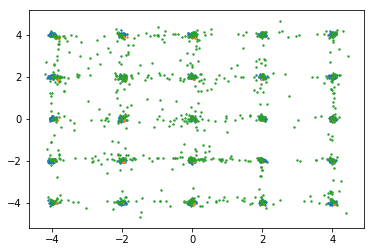

step 14600: KL: 2.417e+03, rec: -3.022e+03


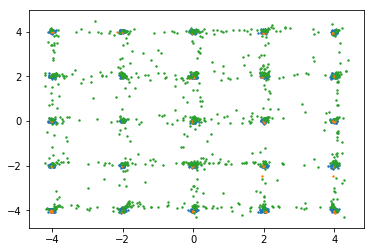

step 14700: KL: 2.342e+03, rec: -3.208e+03


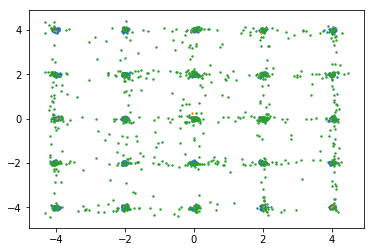

step 14800: KL: 2.337e+03, rec: -3.015e+03


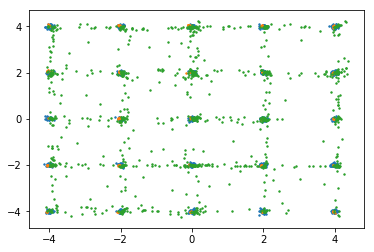

step 14900: KL: 2.358e+03, rec: -3.077e+03


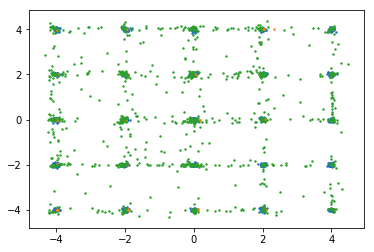

step 15000: KL: 2.322e+03, rec: -2.891e+03


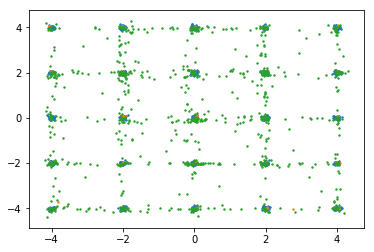

step 15100: KL: 2.287e+03, rec: -2.649e+03


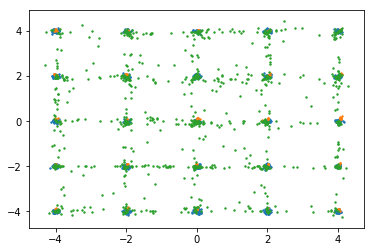

step 15200: KL: 2.363e+03, rec: -3.009e+03


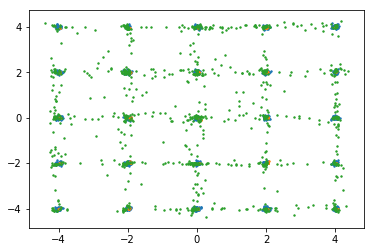

step 15300: KL: 2.415e+03, rec: -2.990e+03


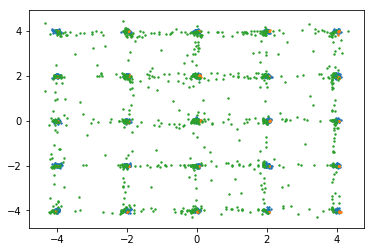

step 15400: KL: 2.354e+03, rec: -2.843e+03


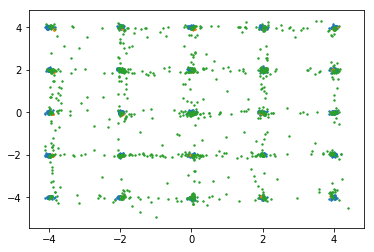

step 15500: KL: 2.407e+03, rec: -3.146e+03


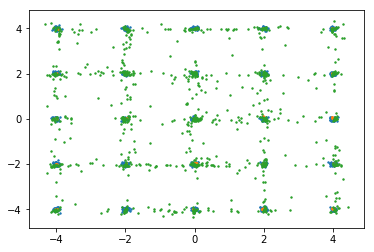

step 15600: KL: 2.294e+03, rec: -3.115e+03


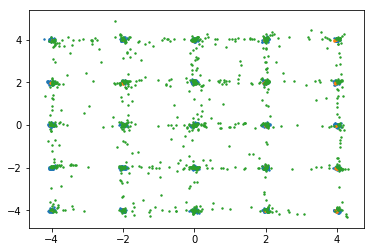

step 15700: KL: 2.307e+03, rec: -2.874e+03


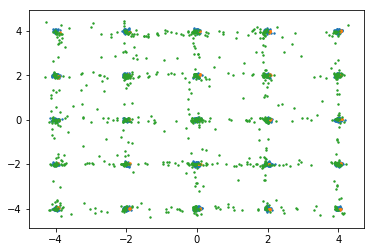

step 15800: KL: 2.342e+03, rec: -2.880e+03


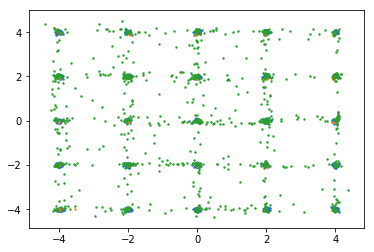

step 15900: KL: 2.412e+03, rec: -2.733e+03


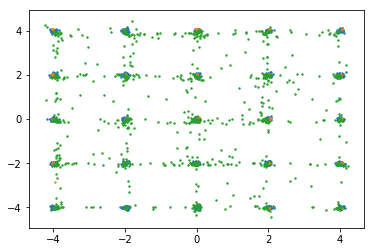

step 16000: KL: 2.361e+03, rec: -2.907e+03


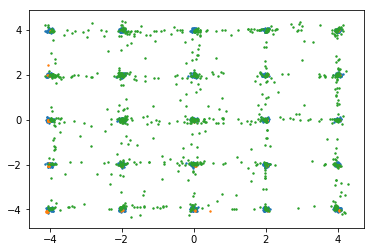

step 16100: KL: 2.410e+03, rec: -2.928e+03


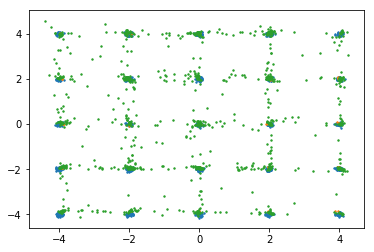

step 16200: KL: 2.357e+03, rec: -2.852e+03


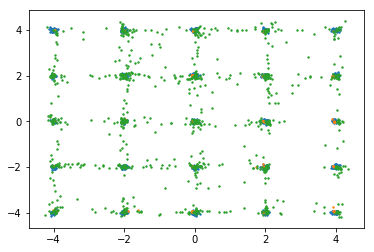

step 16300: KL: 2.443e+03, rec: -2.936e+03


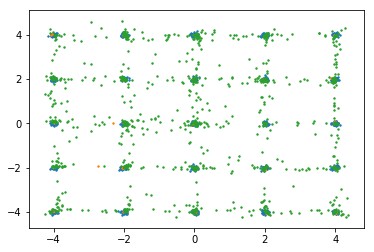

step 16400: KL: 2.298e+03, rec: -2.957e+03


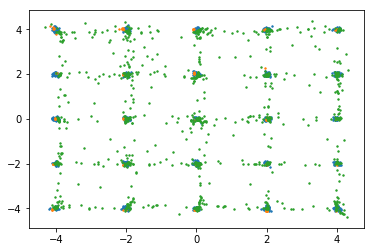

step 16500: KL: 2.359e+03, rec: -2.230e+03


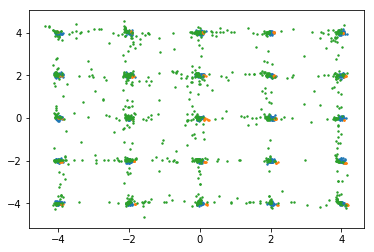

step 16600: KL: 2.355e+03, rec: -2.859e+03


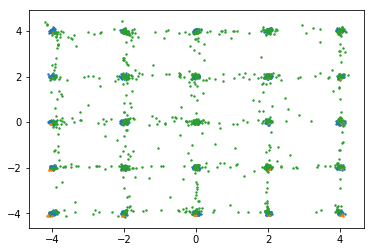

step 16700: KL: 2.425e+03, rec: -2.850e+03


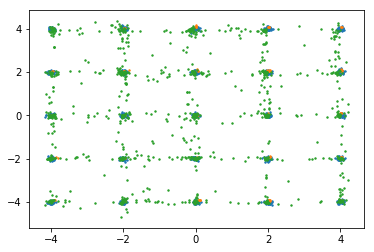

step 16800: KL: 2.375e+03, rec: -3.118e+03


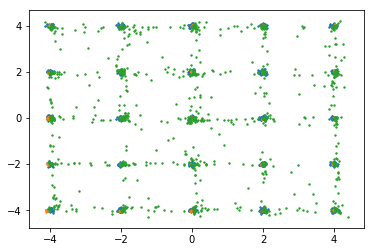

step 16900: KL: 2.338e+03, rec: -3.214e+03


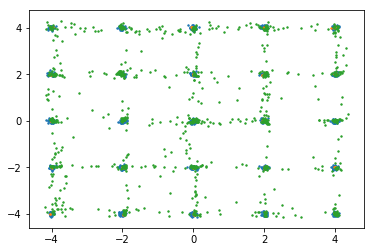

step 17000: KL: 2.462e+03, rec: -3.064e+03


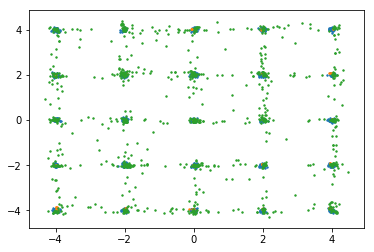

step 17100: KL: 2.332e+03, rec: -2.441e+03


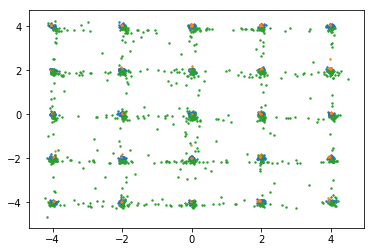

step 17200: KL: 2.345e+03, rec: -3.216e+03


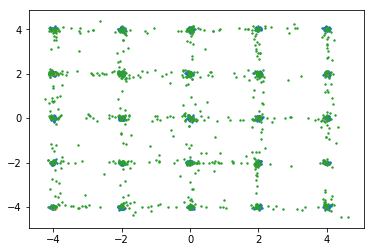

step 17300: KL: 2.357e+03, rec: -2.911e+03


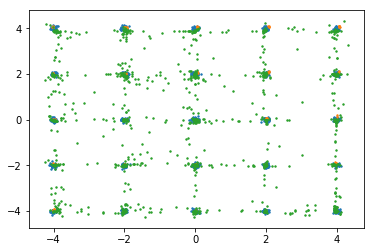

step 17400: KL: 2.309e+03, rec: -3.006e+03


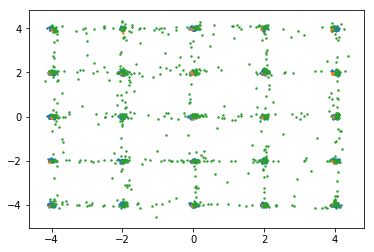

step 17500: KL: 2.321e+03, rec: -2.780e+03


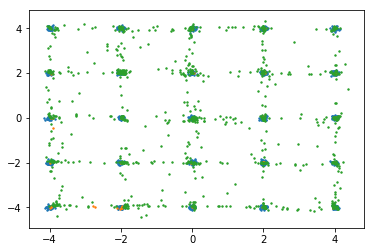

step 17600: KL: 2.432e+03, rec: -2.992e+03


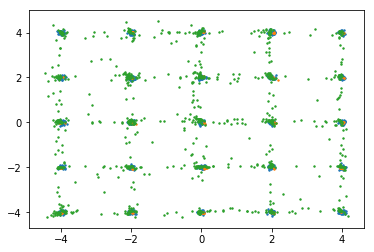

step 17700: KL: 2.377e+03, rec: -2.132e+03


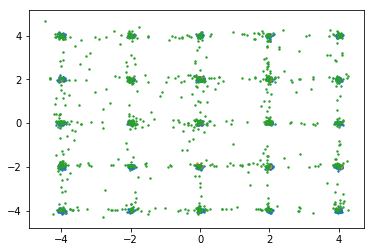

step 17800: KL: 2.358e+03, rec: -3.142e+03


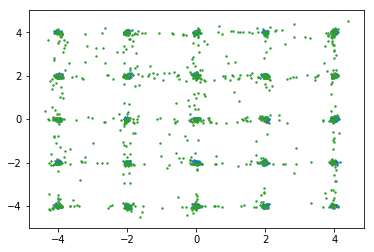

step 17900: KL: 2.332e+03, rec: -2.842e+03


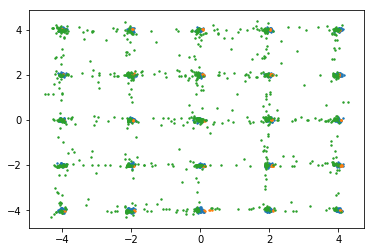

step 18000: KL: 2.308e+03, rec: -3.174e+03


step 18100: KL: 2.431e+03, rec: -2.710e+03


step 18200: KL: 2.363e+03, rec: -2.619e+03


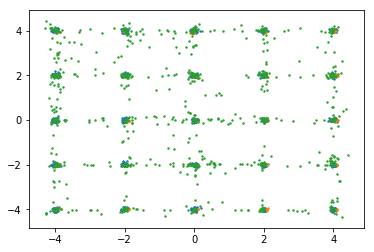

step 18300: KL: 2.378e+03, rec: -3.107e+03


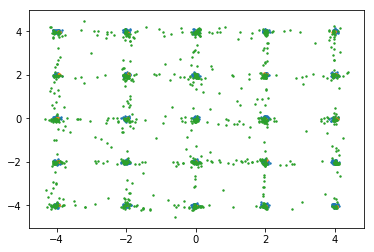

step 18400: KL: 2.442e+03, rec: -2.346e+03


step 18500: KL: 2.359e+03, rec: -3.261e+03


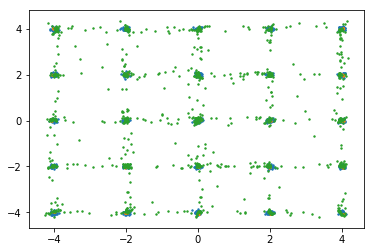

step 18600: KL: 2.348e+03, rec: -2.629e+03


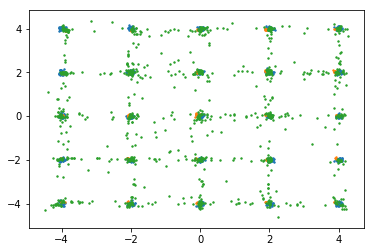

step 18700: KL: 2.415e+03, rec: -3.005e+03


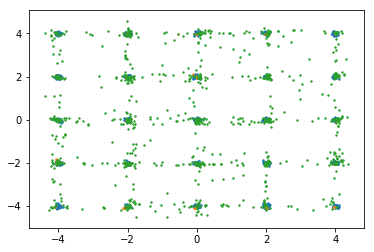

step 18800: KL: 2.370e+03, rec: -1.381e+03


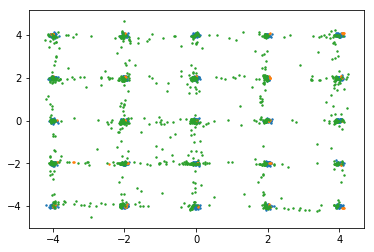

step 18900: KL: 2.455e+03, rec: -2.590e+03


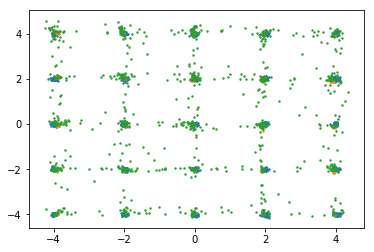

step 19000: KL: 2.359e+03, rec: -3.154e+03


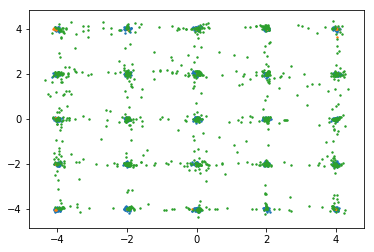

step 19100: KL: 2.371e+03, rec: -3.154e+03


step 19200: KL: 2.480e+03, rec: -3.043e+03


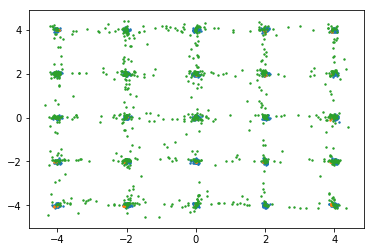

step 19300: KL: 2.372e+03, rec: -2.995e+03


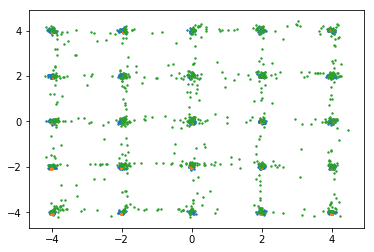

step 19400: KL: 2.338e+03, rec: -3.156e+03


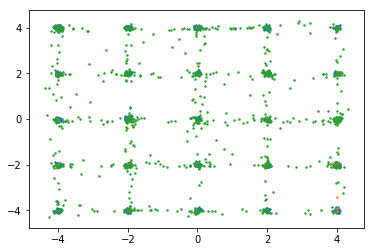

step 19500: KL: 2.338e+03, rec: -3.128e+03


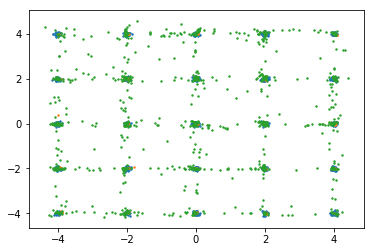

step 19600: KL: 2.414e+03, rec: -2.947e+03


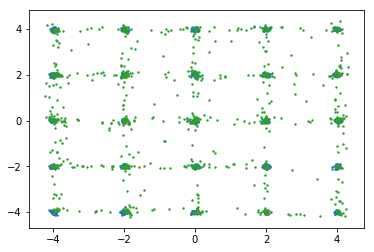

step 19700: KL: 2.449e+03, rec: -2.717e+03


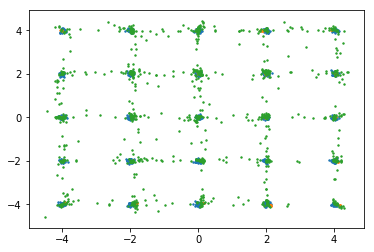

step 19800: KL: 2.522e+03, rec: -3.084e+03


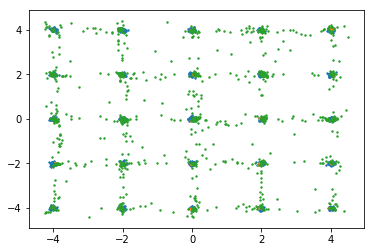

step 19900: KL: 2.427e+03, rec: -2.453e+03


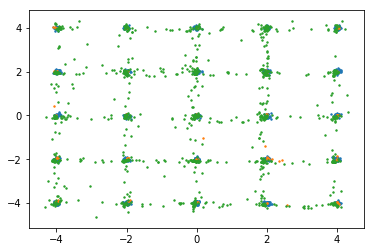

step 20000: KL: 2.398e+03, rec: -3.213e+03


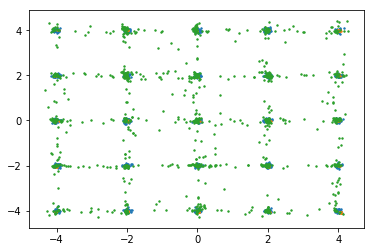

In [0]:
from torch.distributions import MultivariateNormal
from torch.distributions import Normal

# Total number of training iterations for the VAE
N_ITER = 22001
# Batch size to use
BATCHLEN = 128

encoder = Encoder()
optim_enc = torch.optim.Adam(encoder.parameters(), lr=0.001, betas=(0.5,0.9))
decoder = Decoder()
optim_dec = torch.optim.Adam(decoder.parameters(), lr=0.001, betas=(0.5,0.9))

loss_kl_history = []
loss_rec_history = []

for i in range(N_ITER):
    encoder.zero_grad()
    decoder.zero_grad()
    
    x = generate_batch(BATCHLEN)
    enc_mu, enc_logvar = encoder(x)
        
    # First (DKL) part of the VAE loss
    loss_kl = 0.5*(torch.sum(enc_mu**2) + torch.sum(torch.exp(enc_logvar)) - torch.sum(enc_logvar) - torch.tensor(LATENT_N))  # FILL HERE
    
    # Compute here the sample z
    enc_std = torch.exp(0.5*enc_logvar)
    
    # Sample from q
    normal_dist_q = Normal(0, torch.ones(BATCHLEN, LATENT_N))
    z = torch.mul(normal_dist_q.rsample(), enc_std) + enc_mu
    
    dec_mu, dec_logvar = decoder(z)
    dec_std = torch.exp(0.5*dec_logvar)
    
    # Second part of the VAE loss
    loss_rec = torch.sum(dec_logvar) + 0.5*torch.sum(((x-dec_mu)**2)/dec_std)
    
    (loss_kl + loss_rec).backward()
    optim_enc.step()
    optim_dec.step()
    
    # plot the result
    if i%100 == 0:
        print('step {}: KL: {:.3e}, rec: {:.3e}'.format(i, float(loss_kl), float(loss_rec)))
        loss_kl_history.append(loss_kl)
        loss_rec_history.append(loss_rec)
        real_batch = generate_batch(1024)
        rec_batch = torch.normal(dec_mu, torch.exp(0.5*dec_logvar)).detach()
        fake_batch = decoder.generate(1024).detach()
        plt.scatter(real_batch[:,0], real_batch[:,1], s=2.0, label='real data')
        plt.scatter(rec_batch[:,0], rec_batch[:,1], s=2.0, label='rec data')
        plt.scatter(fake_batch[:,0], fake_batch[:,1], s=2.0, label='fake data')
        plt.show()

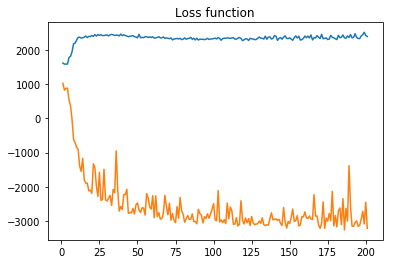

In [0]:
# Plotting the loss functions
n_history = len(loss_kl_history)
plt.title("Loss function")
plt.plot(list(range(1,n_history + 1)), loss_kl_history)
plt.plot(list(range(1,n_history + 1)), loss_rec_history)
plt.show()